In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
base_df_resampled = pd.read_csv("filtered_df.csv")

In [ ]:
#Train-test split
train_base, test_base = train_test_split(base_df_resampled, test_size=0.2, random_state=123)
train_base.reset_index(drop=True, inplace=True)
test_base.reset_index(drop=True, inplace=True)

#The role of meteorological variables

#Predicting moisture at 10 cm depth

##From 20cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_20cm
X_train_20cm_only = train_base[['moisture_20cm']]
y_train_20cm_only = train_base['moisture_10cm']
X_test_20cm_only = test_base[['moisture_20cm']]
y_test_20cm_only = test_base['moisture_10cm']

# Full model (with meteorological and moisture_20cm features)
features_to_exclude = ['moisture_10cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full = train_base.drop(columns=features_to_exclude)
y_train_full = train_base['moisture_10cm']
X_test_full = test_base.drop(columns=features_to_exclude)
y_test_full = test_base['moisture_10cm']

# ==== 3. Baseline Extra Trees using moisture_20cm + meteorological features ====
features_to_exclude_partial = ['moisture_10cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm','timestamp_device']
X_train_20cm_meteo = train_base.drop(columns=features_to_exclude_partial)
X_test_20cm_meteo = test_base.drop(columns=features_to_exclude_partial)

In [ ]:
# Model using moisture_20cm only
rf_20cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_20cm.fit(X_train_20cm_only, y_train_20cm_only)
y_train_pred_20cm = rf_20cm.predict(X_train_20cm_only)
y_test_pred_20cm = rf_20cm.predict(X_test_20cm_only)

print("Random Forest - moisture_20cm only")
print("Train R2:", r2_score(y_train_20cm_only, y_train_pred_20cm))
print("Test R2:", r2_score(y_test_20cm_only, y_test_pred_20cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_20cm_only, y_train_pred_20cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_20cm_only, y_test_pred_20cm)))

# Model using moisture_20cm + meteorological features
rf_full = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full.fit(X_train_full, y_train_full)
y_train_pred_full = rf_full.predict(X_train_full)
y_test_pred_full = rf_full.predict(X_test_full)

print("\nRandom Forest - moisture_20cm + meteorological features")
print("Train R2:", r2_score(y_train_full, y_train_pred_full))
print("Test R2:", r2_score(y_test_full, y_test_pred_full))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full, y_train_pred_full)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full, y_test_pred_full)))

Random Forest - moisture_20cm only
Train R2: 0.7484760883311095
Test R2: 0.7475716260519574
Train RMSE: 0.04327957464603058
Test RMSE: 0.04330861794840899

Random Forest - moisture_20cm + meteorological features
Train R2: 0.9921184754678105
Test R2: 0.9461340475975979
Train RMSE: 0.007661229291290912
Test RMSE: 0.020006098904705262


In [ ]:
#REGULATED
# Model using moisture_20cm + meteorological features
rf_full = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15,  min_samples_split=2)
rf_full.fit(X_train_full, y_train_full)
y_train_pred_full = rf_full.predict(X_train_full)
y_test_pred_full = rf_full.predict(X_test_full)

print("\nRandom Forest - moisture_20cm + meteorological features")
print("Train R2:", r2_score(y_train_full, y_train_pred_full))
print("Test R2:", r2_score(y_test_full, y_test_pred_full))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full, y_train_pred_full)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full, y_test_pred_full)))


Random Forest - moisture_20cm + meteorological features
Train R2: 0.940562003409168
Test R2: 0.915565387140896
Train RMSE: 0.02103901610002889
Test RMSE: 0.025047564188386443



Feature importance - Random Forest (Regulated) moisture_20cm + meteorological features:
            Feature  Importance
0     moisture_20cm    0.829868
1     temperature_c    0.066126
2  humidity_percent    0.040430
6   wind_speed_max2    0.017303
7         radiation    0.017159
8               vpd    0.009709
5        wind_speed    0.009416
4          leaf_wet    0.007466
3        amnt_precp    0.002522


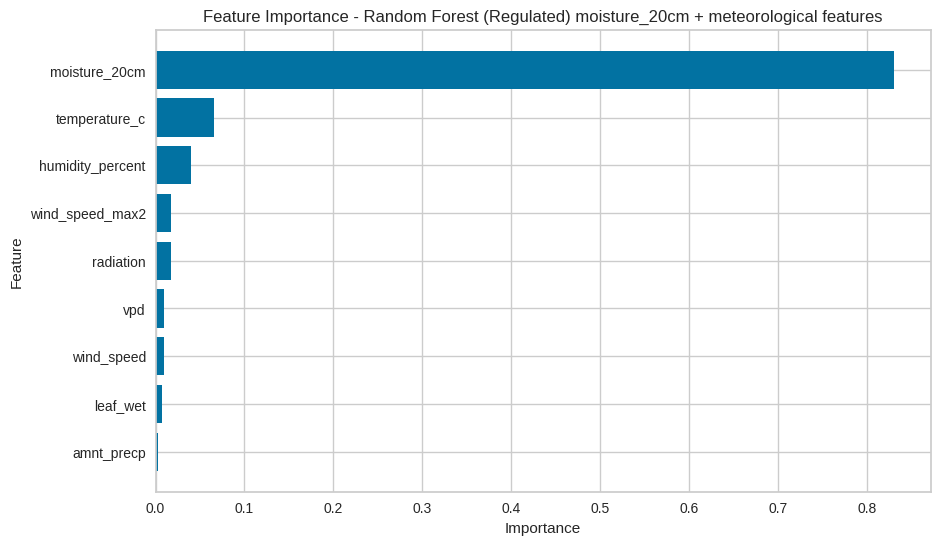

In [ ]:
# 3. Feature importance for moisture_20cm + meteorological features model
print("\nFeature importance - Random Forest (Regulated) moisture_20cm + meteorological features:")
feat_imp_rf1 = pd.DataFrame({
    'Feature': X_train_full.columns,
    'Importance': rf_full.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf1)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf1['Feature'], feat_imp_rf1['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_20cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##From 30cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_30cm
X_train_30cm_only = train_base[['moisture_30cm']]
y_train_30cm_only = train_base['moisture_10cm']
X_test_30cm_only = test_base[['moisture_30cm']]
y_test_30cm_only = test_base['moisture_10cm']

# Full model (with meteorological and moisture_30cm features)
features_to_exclude = ['moisture_10cm', 'moisture_20cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm','timestamp_device']
X_train_full = train_base.drop(columns=features_to_exclude)
y_train_full = train_base['moisture_10cm']
X_test_full = test_base.drop(columns=features_to_exclude)
y_test_full = test_base['moisture_10cm']

In [ ]:
# Model using only moisture_30cm
rf_30cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_30cm.fit(X_train_30cm_only, y_train_30cm_only)
y_train_pred_30cm = rf_30cm.predict(X_train_30cm_only)
y_test_pred_30cm = rf_30cm.predict(X_test_30cm_only)

print("\nRandom Forest - moisture_30cm only")
print("Train R2:", r2_score(y_train_30cm_only, y_train_pred_30cm))
print("Test R2:", r2_score(y_test_30cm_only, y_test_pred_30cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_30cm_only, y_train_pred_30cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_30cm_only, y_test_pred_30cm)))



Random Forest - moisture_30cm only
Train R2: 0.5068255478336829
Test R2: 0.5083196826128191
Train RMSE: 0.06060293115581782
Test RMSE: 0.06044308905310156


In [ ]:
# Model using moisture_30cm + meteorological features
rf_full = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full.fit(X_train_full, y_train_full)
y_train_pred_full = rf_full.predict(X_train_full)
y_test_pred_full = rf_full.predict(X_test_full)

print("\nRandom Forest - moisture_30cm + meteorological features")
print("Train R2:", r2_score(y_train_full, y_train_pred_full))
print("Test R2:", r2_score(y_test_full, y_test_pred_full))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full, y_train_pred_full)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full, y_test_pred_full)))


Random Forest - moisture_30cm + meteorological features
Train R2: 0.9844809762594943
Test R2: 0.8952063364466525
Train RMSE: 0.010750422763559976
Test RMSE: 0.02790440404530979


In [ ]:
#REGULATED
# Model using moisture_30cm + meteorological features
rf_full = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15,  min_samples_split=2)
rf_full.fit(X_train_full, y_train_full)
y_train_pred_full = rf_full.predict(X_train_full)
y_test_pred_full = rf_full.predict(X_test_full)

print("\nRandom Forest - moisture_30cm + meteorological features")
print("Train R2:", r2_score(y_train_full, y_train_pred_full))
print("Test R2:", r2_score(y_test_full, y_test_pred_full))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full, y_train_pred_full)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full, y_test_pred_full)))


Random Forest - moisture_30cm + meteorological features
Train R2: 0.8512039173363403
Test R2: 0.813010218271959
Train RMSE: 0.033288106593902474
Test RMSE: 0.037274701764396505



Feature importance - Random Forest moisture_30cm + meteorological features:
            Feature  Importance
0     moisture_30cm    0.664864
1     temperature_c    0.123559
2  humidity_percent    0.079791
6   wind_speed_max2    0.036110
7         radiation    0.027668
4          leaf_wet    0.024904
8               vpd    0.018981
5        wind_speed    0.018247
3        amnt_precp    0.005876


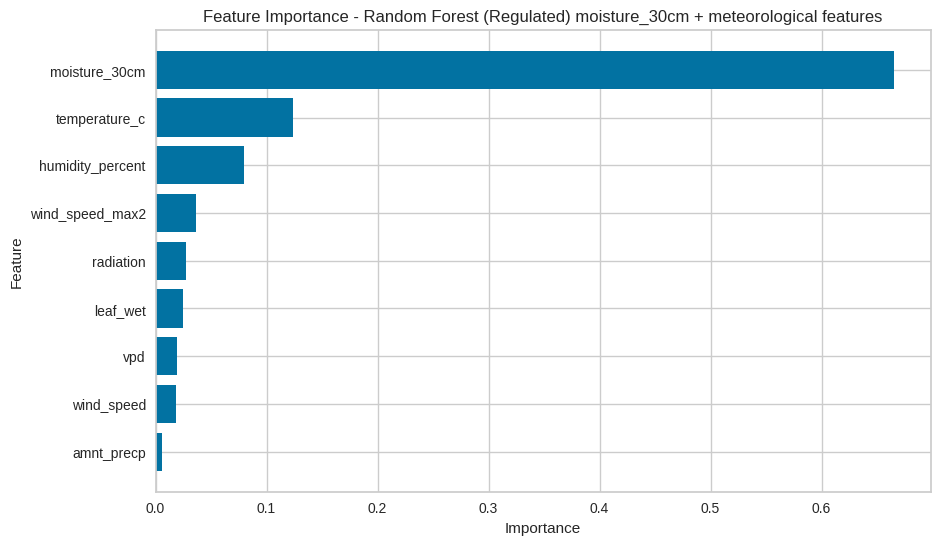

In [ ]:
# 3. Feature importance for moisture_20cm + meteorological features model
print("\nFeature importance - Random Forest moisture_30cm + meteorological features:")
feat_imp_rf2 = pd.DataFrame({
    'Feature': X_train_full.columns,
    'Importance': rf_full.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf2)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf2['Feature'], feat_imp_rf2['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_30cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 40

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_40cm
X_train_40cm_only = train_base[['moisture_40cm']]
y_train_40cm_only = train_base['moisture_10cm']
X_test_40cm_only = test_base[['moisture_40cm']]
y_test_40cm_only = test_base['moisture_10cm']

# Full model (with meteorological and moisture_40cm features)
features_to_exclude = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full = train_base.drop(columns=features_to_exclude)
y_train_full = train_base['moisture_10cm']
X_test_full = test_base.drop(columns=features_to_exclude)
y_test_full = test_base['moisture_10cm']

In [ ]:
# Model using only moisture_40cm
rf_40cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_40cm.fit(X_train_40cm_only, y_train_40cm_only)
y_train_pred_40cm = rf_40cm.predict(X_train_40cm_only)
y_test_pred_40cm = rf_40cm.predict(X_test_40cm_only)

print("\nRandom Forest - moisture_40cm only")
print("Train R2:", r2_score(y_train_40cm_only, y_train_pred_40cm))
print("Test R2:", r2_score(y_test_40cm_only, y_test_pred_40cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_40cm_only, y_train_pred_40cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_40cm_only, y_test_pred_40cm)))


Random Forest - moisture_40cm only
Train R2: 0.4400136117868698
Test R2: 0.4393889718137053
Train RMSE: 0.064577626658832
Test RMSE: 0.06454105473850949


In [ ]:
# Model using moisture_40cm + meteorological features
rf_full = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full.fit(X_train_full, y_train_full)
y_train_pred_full = rf_full.predict(X_train_full)
y_test_pred_full = rf_full.predict(X_test_full)

print("\nRandom Forest - moisture_40cm + meteorological features")
print("Train R2:", r2_score(y_train_full, y_train_pred_full))
print("Test R2:", r2_score(y_test_full, y_test_pred_full))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full, y_train_pred_full)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full, y_test_pred_full)))


Random Forest - moisture_40cm + meteorological features
Train R2: 0.9840522858082442
Test R2: 0.8868540664669013
Train RMSE: 0.010897893677478652
Test RMSE: 0.028995106950888666


In [ ]:
#REGULAATED
# Model using moisture_40cm + meteorological features
rf_full = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15,  min_samples_split=2)
rf_full.fit(X_train_full, y_train_full)
y_train_pred_full = rf_full.predict(X_train_full)
y_test_pred_full = rf_full.predict(X_test_full)

print("\nRandom Forest - moisture_40cm + meteorological features")
print("Train R2:", r2_score(y_train_full, y_train_pred_full))
print("Test R2:", r2_score(y_test_full, y_test_pred_full))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full, y_train_pred_full)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full, y_test_pred_full)))


Random Forest - moisture_40cm + meteorological features
Train R2: 0.8244314416917485
Test R2: 0.7901564534786891
Train RMSE: 0.03615902537520052
Test RMSE: 0.0394869008086711



Feature importance - Random Forest moisture_40cm + meteorological features:
            Feature  Importance
0     moisture_40cm    0.642803
1     temperature_c    0.137116
2  humidity_percent    0.070245
6   wind_speed_max2    0.038147
5        wind_speed    0.036346
4          leaf_wet    0.032144
7         radiation    0.025344
8               vpd    0.014731
3        amnt_precp    0.003124


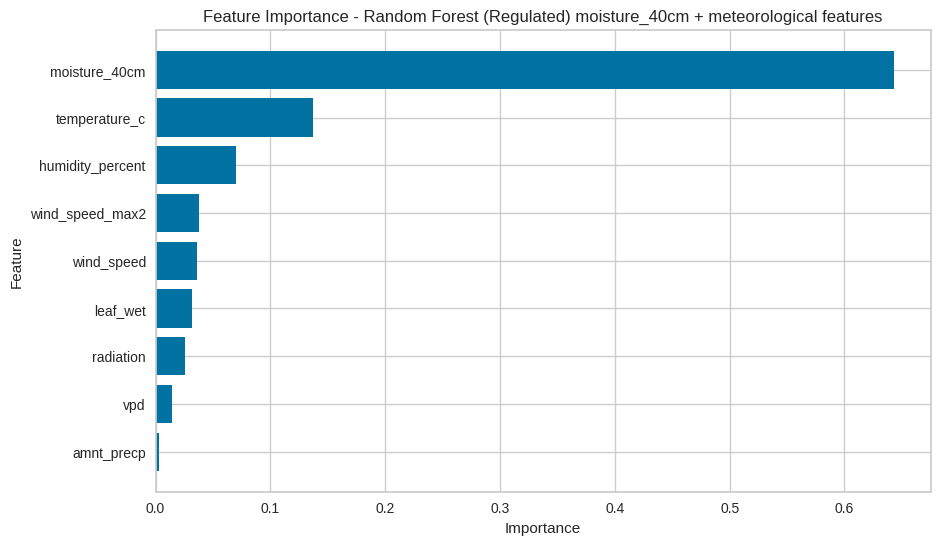

In [ ]:
print("\nFeature importance - Random Forest moisture_40cm + meteorological features:")
feat_imp_rf3 = pd.DataFrame({
    'Feature': X_train_full.columns,
    'Importance': rf_full.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf3)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf3['Feature'], feat_imp_rf3['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_40cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##From 50

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_50cm
X_train_50cm_only = train_base[['moisture_50cm']]
y_train_50cm_only = train_base['moisture_10cm']
X_test_50cm_only = test_base[['moisture_50cm']]
y_test_50cm_only = test_base['moisture_10cm']

# Full model (with meteorological and moisture_50cm features)
features_to_exclude_50cm = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device']
X_train_full_50cm = train_base.drop(columns=features_to_exclude_50cm)
y_train_full_50cm = train_base['moisture_10cm']
X_test_full_50cm = test_base.drop(columns=features_to_exclude_50cm)
y_test_full_50cm = test_base['moisture_10cm']

In [ ]:
# Model using moisture_50cm only
rf_50cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_50cm.fit(X_train_50cm_only, y_train_50cm_only)
y_train_pred_50cm = rf_50cm.predict(X_train_50cm_only)
y_test_pred_50cm = rf_50cm.predict(X_test_50cm_only)

print("\nRandom Forest - moisture_50cm only")
print("Train R2:", r2_score(y_train_50cm_only, y_train_pred_50cm))
print("Test R2:", r2_score(y_test_50cm_only, y_test_pred_50cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_50cm_only, y_train_pred_50cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_50cm_only, y_test_pred_50cm)))


Random Forest - moisture_50cm only
Train R2: 0.36231581749389363
Test R2: 0.36866909887041655
Train RMSE: 0.06891220826079693
Test RMSE: 0.06849104041533723


In [ ]:
# Model using moisture_50cm + meteorological features
rf_full_50cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_50cm.fit(X_train_full_50cm, y_train_full_50cm)
y_train_pred_full_50cm = rf_full_50cm.predict(X_train_full_50cm)
y_test_pred_full_50cm = rf_full_50cm.predict(X_test_full_50cm)

print("\nRandom Forest - moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_50cm, y_train_pred_full_50cm))
print("Test R2:", r2_score(y_test_full_50cm, y_test_pred_full_50cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_50cm, y_train_pred_full_50cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_50cm, y_test_pred_full_50cm)))


Random Forest - moisture_50cm + meteorological features
Train R2: 0.9789974662609247
Test R2: 0.8505236051281703
Train RMSE: 0.012506310016480116
Test RMSE: 0.03332664132219436



Feature importance - Random Forest moisture_50cm + meteorological features:
            Feature  Importance
0     moisture_50cm    0.460690
1     temperature_c    0.198051
2  humidity_percent    0.127891
6   wind_speed_max2    0.055070
7         radiation    0.053528
8               vpd    0.035173
5        wind_speed    0.033704
4          leaf_wet    0.030925
3        amnt_precp    0.004968


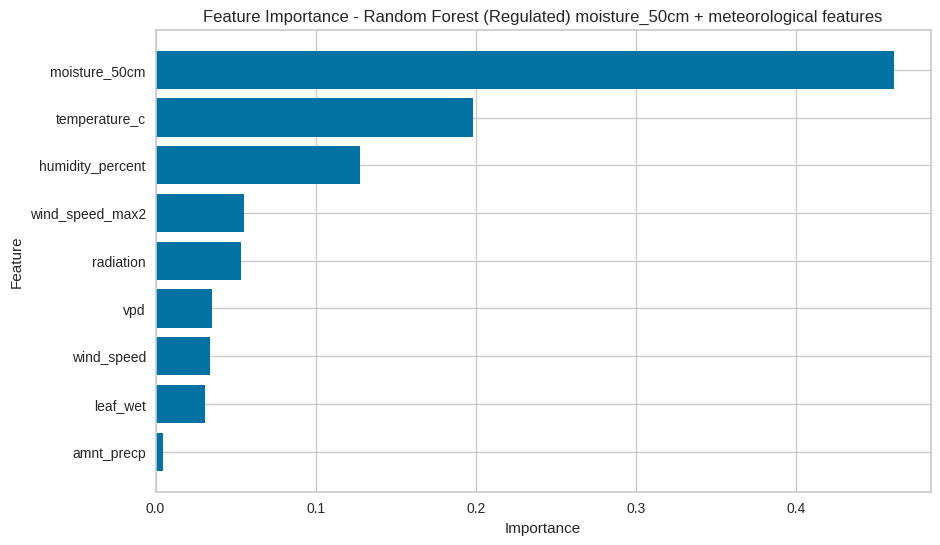

In [ ]:
print("\nFeature importance - Random Forest moisture_50cm + meteorological features:")
feat_imp_rf4 = pd.DataFrame({
    'Feature': X_train_full_50cm.columns,
    'Importance': rf_full_50cm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf4)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf4['Feature'], feat_imp_rf4['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_50cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 60

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_60cm
X_train_60cm_only = train_base[['moisture_60cm']]
y_train_60cm_only = train_base['moisture_10cm']
X_test_60cm_only = test_base[['moisture_60cm']]
y_test_60cm_only = test_base['moisture_10cm']

# Full model (with meteorological and moisture_60cm features)
features_to_exclude = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'timestamp_device']
X_train_full_60 = train_base.drop(columns=features_to_exclude)
y_train_full_60 = train_base['moisture_10cm']
X_test_full_60 = test_base.drop(columns=features_to_exclude)
y_test_full_60 = test_base['moisture_10cm']

In [ ]:
# Model using moisture_60cm only
rf_60cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_60cm.fit(X_train_60cm_only, y_train_60cm_only)
y_train_pred_60cm = rf_60cm.predict(X_train_60cm_only)
y_test_pred_60cm = rf_60cm.predict(X_test_60cm_only)

print("\nRandom Forest - moisture_60cm only")
print("Train R2:", r2_score(y_train_60cm_only, y_train_pred_60cm))
print("Test R2:", r2_score(y_test_60cm_only, y_test_pred_60cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_60cm_only, y_train_pred_60cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_60cm_only, y_test_pred_60cm)))


Random Forest - moisture_60cm only
Train R2: 0.3955859348867873
Test R2: 0.3990768844516934
Train RMSE: 0.06709043776387355
Test RMSE: 0.06682126531835794


In [ ]:
# Model using moisture_60cm + meteorological features
rf_full_60cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_60cm.fit(X_train_full_60, y_train_full_60)
y_train_pred_full_60cm = rf_full_60cm.predict(X_train_full_60)
y_test_pred_full_60cm = rf_full_60cm.predict(X_test_full_60)

print("\nRandom Forest - moisture_60cm + meteorological features")
print("Train R2:", r2_score(y_train_full_60, y_train_pred_full_60cm))
print("Test R2:", r2_score(y_test_full_60, y_test_pred_full_60cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_60, y_train_pred_full_60cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_60, y_test_pred_full_60cm)))


Random Forest - moisture_60cm + meteorological features
Train R2: 0.9816323127753104
Test R2: 0.8714880865549106
Train RMSE: 0.011695548177817225
Test RMSE: 0.030901313138798344


In [ ]:
#REGULATED
# Model using moisture_60cm + meteorological features
rf_full_60cm = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15,  min_samples_split=2)
rf_full_60cm.fit(X_train_full_60, y_train_full_60)
y_train_pred_full_60cm = rf_full_60cm.predict(X_train_full_60)
y_test_pred_full_60cm = rf_full_60cm.predict(X_test_full_60)

print("\nRandom Forest - moisture_60cm + meteorological features")
print("Train R2:", r2_score(y_train_full_60, y_train_pred_full_60cm))
print("Test R2:", r2_score(y_test_full_60, y_test_pred_full_60cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_60, y_train_pred_full_60cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_60, y_test_pred_full_60cm)))


Random Forest - moisture_60cm + meteorological features
Train R2: 0.8638742465016276
Test R2: 0.8110195335875027
Train RMSE: 0.03183929867528334
Test RMSE: 0.0374725888715652



Feature importance - Random Forest moisture_60cm + meteorological features:
            Feature  Importance
0     moisture_60cm    0.567236
1     temperature_c    0.184745
2  humidity_percent    0.088129
7         radiation    0.039396
6   wind_speed_max2    0.039378
4          leaf_wet    0.028353
8               vpd    0.023696
5        wind_speed    0.022708
3        amnt_precp    0.006358


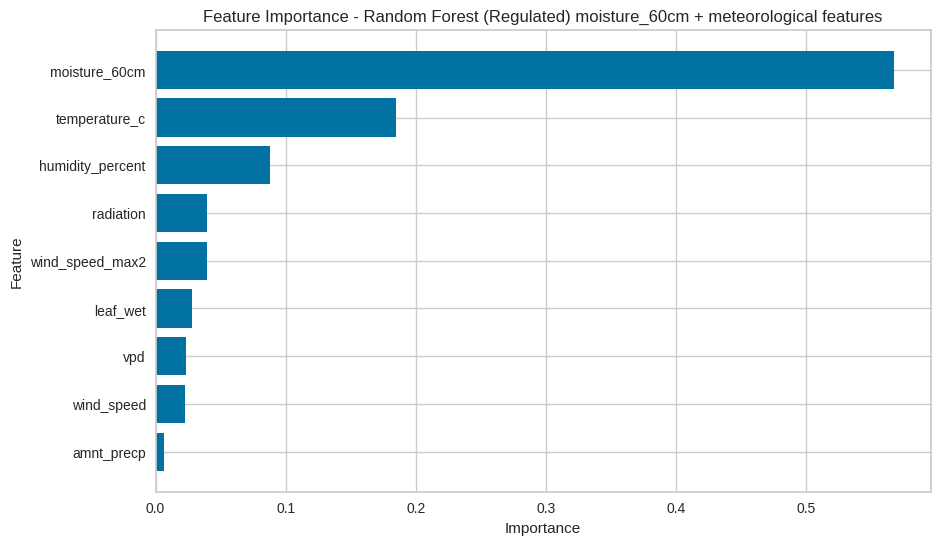

In [ ]:
print("\nFeature importance - Random Forest moisture_60cm + meteorological features:")
feat_imp_rf5 = pd.DataFrame({
    'Feature': X_train_full_60.columns,
    'Importance': rf_full_60cm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf5)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf5['Feature'], feat_imp_rf5['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_60cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Predicitng Moisture at 20cm

##From 10cm depth

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_10cm
X_train_10cm_only = train_base[['moisture_10cm']]
y_train_10cm_only = train_base['moisture_20cm']
X_test_10cm_only = test_base[['moisture_10cm']]
y_test_10cm_only = test_base['moisture_20cm']

# Full model (with meteorological and moisture_10cm features)
features_to_exclude_20 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_10 = train_base.drop(columns=features_to_exclude_20)
y_train_full_10 = train_base['moisture_20cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_20)
y_test_full_10 = test_base['moisture_20cm']


In [ ]:
# Model using moisture_10cm only
rf_10cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_10cm.fit(X_train_10cm_only, y_train_10cm_only)
y_train_pred_10cm = rf_10cm.predict(X_train_10cm_only)
y_test_pred_10cm = rf_10cm.predict(X_test_10cm_only)

print("\nRandom Forest - moisture_10cm only")
print("Train R2:", r2_score(y_train_10cm_only, y_train_pred_10cm))
print("Test R2:", r2_score(y_test_10cm_only, y_test_pred_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_10cm_only, y_train_pred_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_10cm_only, y_test_pred_10cm)))


Random Forest - moisture_10cm only
Train R2: 0.7999121775527233
Test R2: 0.7966669283891069
Train RMSE: 0.028195832316283354
Test RMSE: 0.028546176925143205


In [ ]:
# Model using moisture_10cm + meteorological features
rf_full_10cm = RandomForestRegressor(random_state=42, n_estimators= 100)
rf_full_10cm.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10cm = rf_full_10cm.predict(X_train_full_10)
y_test_pred_full_10cm = rf_full_10cm.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10cm))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10cm)))


Random Forest - moisture_10cm + meteorological features
Train R2: 0.9939296042286975
Test R2: 0.9592770519537979
Train RMSE: 0.004911148808674174
Test RMSE: 0.012775077622818775


In [ ]:
#REGULATED
# Model using moisture_10cm + meteorological features
rf_full_10cm = RandomForestRegressor(random_state=42, n_estimators= 100, max_depth = 15, min_samples_split=2 )
rf_full_10cm.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10cm = rf_full_10cm.predict(X_train_full_10)
y_test_pred_full_10cm = rf_full_10cm.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10cm))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10cm)))


Random Forest - moisture_10cm + meteorological features
Train R2: 0.957269873409053
Test R2: 0.9357186259942162
Train RMSE: 0.013029917919021335
Test RMSE: 0.01605042431658812



Feature importance - Random Forest moisture_10cm + meteorological features:
            Feature  Importance
0     moisture_10cm    0.861961
1     temperature_c    0.053811
2  humidity_percent    0.028084
7         radiation    0.014077
6   wind_speed_max2    0.013220
5        wind_speed    0.011124
8               vpd    0.008189
4          leaf_wet    0.007734
3        amnt_precp    0.001798


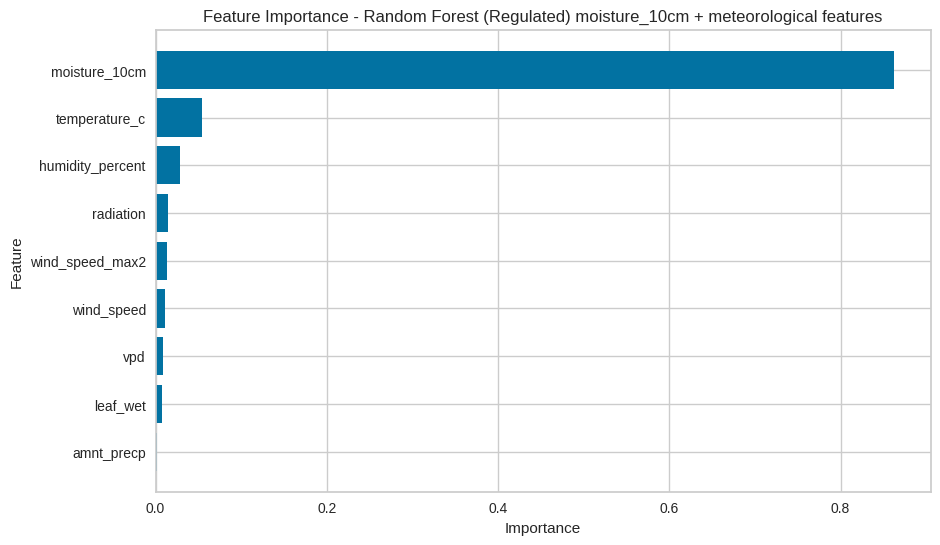

In [ ]:
print("\nFeature importance - Random Forest moisture_10cm + meteorological features:")
feat_imp_rf6 = pd.DataFrame({
    'Feature': X_train_full_10.columns,
    'Importance': rf_full_10cm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf6)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf6['Feature'], feat_imp_rf6['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_10cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##From 30cm depth

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_30cm
X_train_30cm_only = train_base[['moisture_30cm']]
y_train_30cm_only = train_base['moisture_20cm']
X_test_30cm_only = test_base[['moisture_30cm']]
y_test_30cm_only = test_base['moisture_20cm']

# Full model (moisture_30cm + meteorological features)
features_to_exclude_20_from_30 = ['moisture_10cm', 'moisture_20cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_30 = train_base.drop(columns=features_to_exclude_20_from_30)
y_train_full_30 = train_base['moisture_20cm']
X_test_full_30 = test_base.drop(columns=features_to_exclude_20_from_30)
y_test_full_30 = test_base['moisture_20cm']


In [ ]:
# Model using moisture_30cm only
rf_30cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_30cm.fit(X_train_30cm_only, y_train_30cm_only)
y_train_pred_30cm = rf_30cm.predict(X_train_30cm_only)
y_test_pred_30cm = rf_30cm.predict(X_test_30cm_only)

print("\nRandom Forest - moisture_30cm only")
print("Train R2:", r2_score(y_train_30cm_only, y_train_pred_30cm))
print("Test R2:", r2_score(y_test_30cm_only, y_test_pred_30cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_30cm_only, y_train_pred_30cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_30cm_only, y_test_pred_30cm)))


Random Forest - moisture_30cm only
Train R2: 0.7550567782539916
Test R2: 0.7570621532634784
Train RMSE: 0.031196602775103593
Test RMSE: 0.031202653720851955


In [ ]:
# Model using moisture_30cm + meteorological features
rf_full_30cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_30cm.fit(X_train_full_30, y_train_full_30)
y_train_pred_full_30cm = rf_full_30cm.predict(X_train_full_30)
y_test_pred_full_30cm = rf_full_30cm.predict(X_test_full_30)

print("\nRandom Forest - moisture_30cm + meteorological features")
print("Train R2:", r2_score(y_train_full_30, y_train_pred_full_30cm))
print("Test R2:", r2_score(y_test_full_30, y_test_pred_full_30cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_30, y_train_pred_full_30cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_30, y_test_pred_full_30cm)))


Random Forest - moisture_30cm + meteorological features
Train R2: 0.9942970332205738
Test R2: 0.9603570376706501
Train RMSE: 0.00476019792920261
Test RMSE: 0.012604539755930502


In [ ]:
#REGULATED
# Model using moisture_30cm + meteorological features
rf_full_30cm = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15, min_samples_split=2)
rf_full_30cm.fit(X_train_full_30, y_train_full_30)
y_train_pred_full_30cm = rf_full_30cm.predict(X_train_full_30)
y_test_pred_full_30cm = rf_full_30cm.predict(X_test_full_30)

print("\nRandom Forest - moisture_30cm + meteorological features")
print("Train R2:", r2_score(y_train_full_30, y_train_pred_full_30cm))
print("Test R2:", r2_score(y_test_full_30, y_test_pred_full_30cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_30, y_train_pred_full_30cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_30, y_test_pred_full_30cm)))


Random Forest - moisture_30cm + meteorological features
Train R2: 0.9521567065919042
Test R2: 0.9342115884668257
Train RMSE: 0.013787487256852766
Test RMSE: 0.016237480508033912



Feature importance - Random Forest moisture_30cm + meteorological features:
            Feature  Importance
0     moisture_30cm    0.834964
1     temperature_c    0.072965
2  humidity_percent    0.035932
5        wind_speed    0.013612
6   wind_speed_max2    0.012884
4          leaf_wet    0.010367
7         radiation    0.009560
8               vpd    0.008589
3        amnt_precp    0.001127


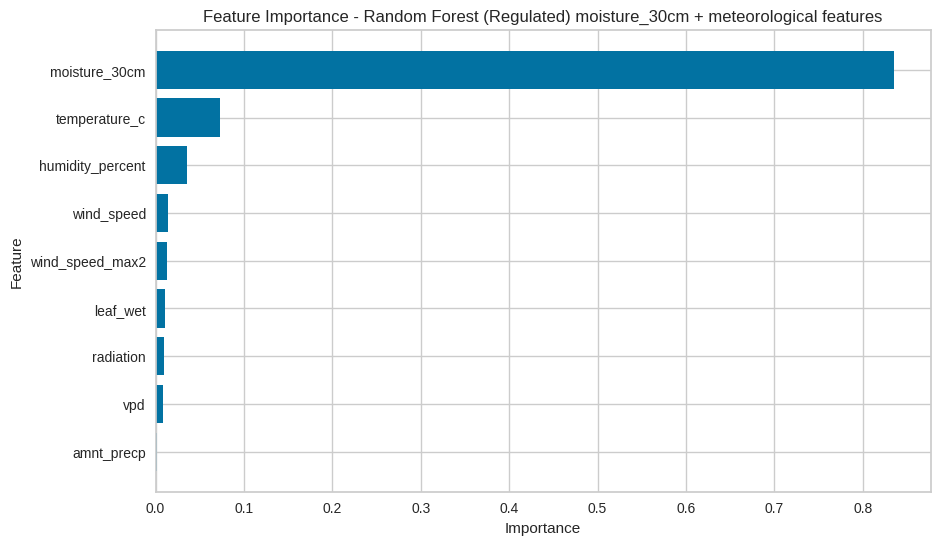

In [ ]:
print("\nFeature importance - Random Forest moisture_30cm + meteorological features:")
feat_imp_rf7 = pd.DataFrame({
    'Feature': X_train_full_30.columns,
    'Importance': rf_full_30cm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf7)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf7['Feature'], feat_imp_rf7['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_30cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 40cm depth

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_40cm
X_train_40cm_only = train_base[['moisture_40cm']]
y_train_40cm_only = train_base['moisture_20cm']
X_test_40cm_only = test_base[['moisture_40cm']]
y_test_40cm_only = test_base['moisture_20cm']

# Full model (moisture_40cm + meteorological features)
features_to_exclude_20_from_40 = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_40 = train_base.drop(columns=features_to_exclude_20_from_40)
y_train_full_40 = train_base['moisture_20cm']
X_test_full_40 = test_base.drop(columns=features_to_exclude_20_from_40)
y_test_full_40 = test_base['moisture_20cm']


In [ ]:
# Model using moisture_40cm only
rf_40cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_40cm.fit(X_train_40cm_only, y_train_40cm_only)
y_train_pred_40cm = rf_40cm.predict(X_train_40cm_only)
y_test_pred_40cm = rf_40cm.predict(X_test_40cm_only)

print("\nRandom Forest - moisture_40cm only")
print("Train R2:", r2_score(y_train_40cm_only, y_train_pred_40cm))
print("Test R2:", r2_score(y_test_40cm_only, y_test_pred_40cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_40cm_only, y_train_pred_40cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_40cm_only, y_test_pred_40cm)))


Random Forest - moisture_40cm only
Train R2: 0.6971491290278908
Test R2: 0.7023114161421273
Train RMSE: 0.034688778215682656
Test RMSE: 0.034540214681836406


In [ ]:
# Model using moisture_40cm + meteorological features
rf_full_40cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_40cm.fit(X_train_full_40, y_train_full_40)
y_train_pred_full_40cm = rf_full_40cm.predict(X_train_full_40)
y_test_pred_full_40cm = rf_full_40cm.predict(X_test_full_40)

print("\nRandom Forest - moisture_40cm + meteorological features")
print("Train R2:", r2_score(y_train_full_40, y_train_pred_full_40cm))
print("Test R2:", r2_score(y_test_full_40, y_test_pred_full_40cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_40, y_train_pred_full_40cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_40, y_test_pred_full_40cm)))


Random Forest - moisture_40cm + meteorological features
Train R2: 0.9917600441958725
Test R2: 0.9430681677274516
Train RMSE: 0.005721857416145851
Test RMSE: 0.015105027598789067


In [ ]:
#REGULATED
# Model using moisture_40cm + meteorological features
rf_full_40cm = RandomForestRegressor(random_state=42, n_estimators=100,max_depth=15, min_samples_leaf= 2)
rf_full_40cm.fit(X_train_full_40, y_train_full_40)
y_train_pred_full_40cm = rf_full_40cm.predict(X_train_full_40)
y_test_pred_full_40cm = rf_full_40cm.predict(X_test_full_40)

print("\nRandom Forest - moisture_40cm + meteorological features")
print("Train R2:", r2_score(y_train_full_40, y_train_pred_full_40cm))
print("Test R2:", r2_score(y_test_full_40, y_test_pred_full_40cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_40, y_train_pred_full_40cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_40, y_test_pred_full_40cm)))


Random Forest - moisture_40cm + meteorological features
Train R2: 0.9429650123609049
Test R2: 0.9169946237770521
Train RMSE: 0.015053769643693158
Test RMSE: 0.018238833288420332



Feature importance - Random Forest moisture_40cm + meteorological features:
            Feature  Importance
0     moisture_40cm    0.801147
1     temperature_c    0.078376
2  humidity_percent    0.046056
6   wind_speed_max2    0.022008
7         radiation    0.017919
5        wind_speed    0.017402
4          leaf_wet    0.008580
8               vpd    0.007491
3        amnt_precp    0.001022


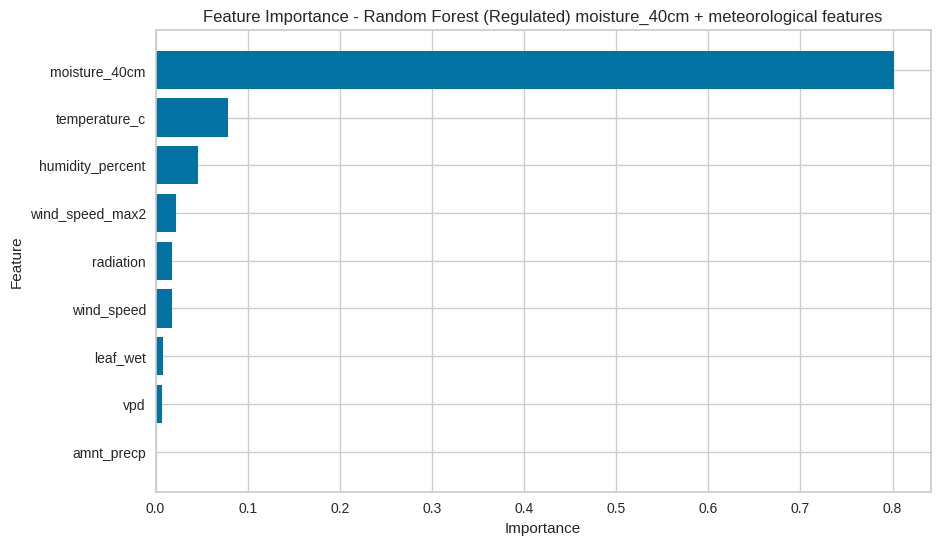

In [ ]:
print("\nFeature importance - Random Forest moisture_40cm + meteorological features:")
feat_imp_rf8 = pd.DataFrame({
    'Feature': X_train_full_40.columns,
    'Importance': rf_full_40cm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf8)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf8['Feature'], feat_imp_rf8['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_40cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 50cm depth

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_50cm
X_train_50cm_only = train_base[['moisture_50cm']]
y_train_50cm_only = train_base['moisture_20cm']
X_test_50cm_only = test_base[['moisture_50cm']]
y_test_50cm_only = test_base['moisture_20cm']

# Full model (moisture_50cm + meteorological features)
features_to_exclude_20_from_50 = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device']
X_train_full_50 = train_base.drop(columns=features_to_exclude_20_from_50)
y_train_full_50 = train_base['moisture_20cm']
X_test_full_50 = test_base.drop(columns=features_to_exclude_20_from_50)
y_test_full_50 = test_base['moisture_20cm']

In [ ]:
# Model using moisture_50cm only
rf_50cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_50cm.fit(X_train_50cm_only, y_train_50cm_only)
y_train_pred_50cm = rf_50cm.predict(X_train_50cm_only)
y_test_pred_50cm = rf_50cm.predict(X_test_50cm_only)

print("\nRandom Forest - moisture_50cm only")
print("Train R2:", r2_score(y_train_50cm_only, y_train_pred_50cm))
print("Test R2:", r2_score(y_test_50cm_only, y_test_pred_50cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_50cm_only, y_train_pred_50cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_50cm_only, y_test_pred_50cm)))


Random Forest - moisture_50cm only
Train R2: 0.6361430708803414
Test R2: 0.6407436527742882
Train RMSE: 0.03802243403500281
Test RMSE: 0.03794426698390624


In [ ]:
# Model using moisture_50cm + meteorological features
rf_full_50cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_50cm.fit(X_train_full_50, y_train_full_50)
y_train_pred_full_50cm = rf_full_50cm.predict(X_train_full_50)
y_test_pred_full_50cm = rf_full_50cm.predict(X_test_full_50)

print("\nRandom Forest - moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_50, y_train_pred_full_50cm))
print("Test R2:", r2_score(y_test_full_50, y_test_pred_full_50cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_50, y_train_pred_full_50cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_50, y_test_pred_full_50cm)))


Random Forest - moisture_50cm + meteorological features
Train R2: 0.9897921870864527
Test R2: 0.9278179958693131
Train RMSE: 0.006368555546745851
Test RMSE: 0.017008202210965804


In [ ]:
#REGULATED
# Model using moisture_50cm + meteorological features
rf_full_50cm = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, min_samples_leaf= 2)
rf_full_50cm.fit(X_train_full_50, y_train_full_50)
y_train_pred_full_50cm = rf_full_50cm.predict(X_train_full_50)
y_test_pred_full_50cm = rf_full_50cm.predict(X_test_full_50)

print("\nRandom Forest - moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_50, y_train_pred_full_50cm))
print("Test R2:", r2_score(y_test_full_50, y_test_pred_full_50cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_50, y_train_pred_full_50cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_50, y_test_pred_full_50cm)))


Random Forest - moisture_50cm + meteorological features
Train R2: 0.9373556798953543
Test R2: 0.9047399789146577
Train RMSE: 0.015776673586534305
Test RMSE: 0.019538862612818002



Feature importance - Random Forest moisture_50cm + meteorological features:
            Feature  Importance
0     moisture_50cm    0.711023
1     temperature_c    0.128886
2  humidity_percent    0.060314
6   wind_speed_max2    0.029909
4          leaf_wet    0.020888
7         radiation    0.019576
5        wind_speed    0.018893
8               vpd    0.009435
3        amnt_precp    0.001075


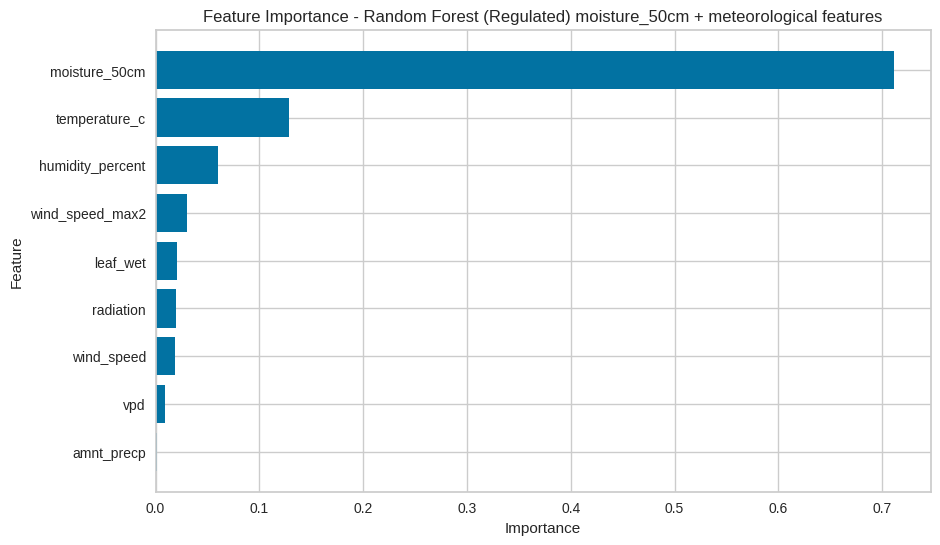

In [ ]:
# 3. Feature importance for moisture_20cm + meteorological features model
print("\nFeature importance - Random Forest moisture_50cm + meteorological features:")
feat_imp_rf9 = pd.DataFrame({
    'Feature': X_train_full_50.columns,
    'Importance': rf_full_50cm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf9)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf9['Feature'], feat_imp_rf9['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_50cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 60cm depth

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_60cm
X_train_60cm_only = train_base[['moisture_60cm']]
y_train_60cm_only = train_base['moisture_20cm']
X_test_60cm_only = test_base[['moisture_60cm']]
y_test_60cm_only = test_base['moisture_20cm']

# Full model (moisture_60cm + meteorological features)
features_to_exclude_20_from_60 = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'timestamp_device']
X_train_full_60 = train_base.drop(columns=features_to_exclude_20_from_60)
y_train_full_60 = train_base['moisture_20cm']
X_test_full_60 = test_base.drop(columns=features_to_exclude_20_from_60)
y_test_full_60 = test_base['moisture_20cm']

In [ ]:
# Model using moisture_60cm only
rf_60cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_60cm.fit(X_train_60cm_only, y_train_60cm_only)
y_train_pred_60cm = rf_60cm.predict(X_train_60cm_only)
y_test_pred_60cm = rf_60cm.predict(X_test_60cm_only)

print("\nRandom Forest - moisture_60cm only")
print("Train R2:", r2_score(y_train_60cm_only, y_train_pred_60cm))
print("Test R2:", r2_score(y_test_60cm_only, y_test_pred_60cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_60cm_only, y_train_pred_60cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_60cm_only, y_test_pred_60cm)))


Random Forest - moisture_60cm only
Train R2: 0.6227310597636021
Test R2: 0.6236439277125287
Train RMSE: 0.03871685894548388
Test RMSE: 0.038836797114098875


In [ ]:
# Model using moisture_60cm + meteorological features
rf_full_60cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_60cm.fit(X_train_full_60, y_train_full_60)
y_train_pred_full_60cm = rf_full_60cm.predict(X_train_full_60)
y_test_pred_full_60cm = rf_full_60cm.predict(X_test_full_60)

print("\nRandom Forest - moisture_60cm + meteorological features")
print("Train R2:", r2_score(y_train_full_60, y_train_pred_full_60cm))
print("Test R2:", r2_score(y_test_full_60, y_test_pred_full_60cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_60, y_train_pred_full_60cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_60, y_test_pred_full_60cm)))


Random Forest - moisture_60cm + meteorological features
Train R2: 0.9894534467050956
Test R2: 0.9258119214463693
Train RMSE: 0.006473361581352148
Test RMSE: 0.017242927576673752


In [ ]:
#REGULATED
# Model using moisture_60cm + meteorological features
rf_full_60cm = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15, min_samples_leaf= 2)
rf_full_60cm.fit(X_train_full_60, y_train_full_60)
y_train_pred_full_60cm = rf_full_60cm.predict(X_train_full_60)
y_test_pred_full_60cm = rf_full_60cm.predict(X_test_full_60)

print("\nRandom Forest - moisture_60cm + meteorological features")
print("Train R2:", r2_score(y_train_full_60, y_train_pred_full_60cm))
print("Test R2:", r2_score(y_test_full_60, y_test_pred_full_60cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_60, y_train_pred_full_60cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_60, y_test_pred_full_60cm)))


Random Forest - moisture_60cm + meteorological features
Train R2: 0.9261273480055439
Test R2: 0.8953928066634971
Train RMSE: 0.017132330166439873
Test RMSE: 0.02047503804837569



Feature importance - Random Forest moisture_60cm + meteorological features:
            Feature  Importance
0     moisture_60cm    0.691465
1     temperature_c    0.140300
2  humidity_percent    0.062922
6   wind_speed_max2    0.025004
4          leaf_wet    0.023949
7         radiation    0.019656
5        wind_speed    0.018219
8               vpd    0.014999
3        amnt_precp    0.003485


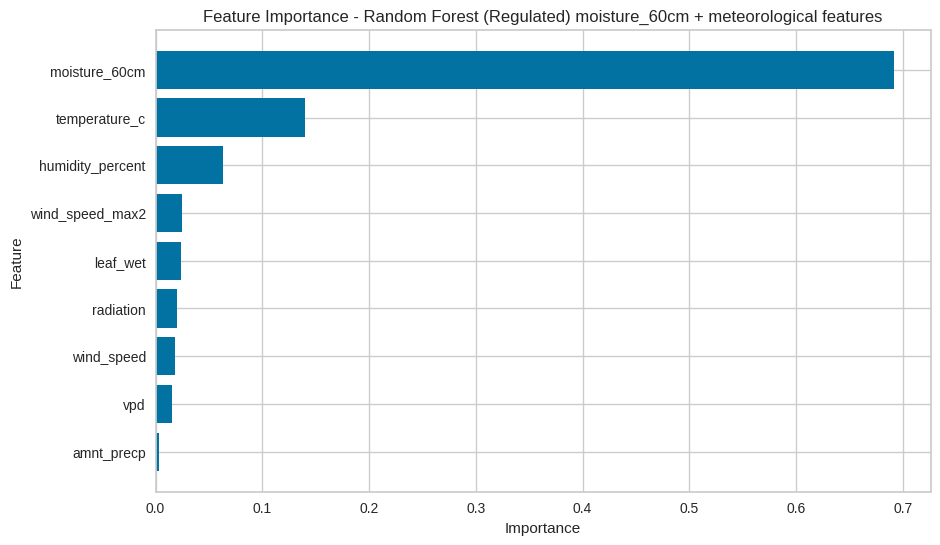

In [ ]:
print("\nFeature importance - Random Forest moisture_60cm + meteorological features:")
feat_imp_rf10 = pd.DataFrame({
    'Feature': X_train_full_60.columns,
    'Importance': rf_full_60cm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf10)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf10['Feature'], feat_imp_rf10['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_60cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Predicitng moisture at 30cm depth

##from 10cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_10cm
X_train_10cm_only = train_base[['moisture_10cm']]
y_train_10cm_only = train_base['moisture_30cm']
X_test_10cm_only = test_base[['moisture_10cm']]
y_test_10cm_only = test_base['moisture_30cm']

# Full model (moisture_10cm + meteorological features)
features_to_exclude_30_from_10 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_10 = train_base.drop(columns=features_to_exclude_30_from_10)
y_train_full_10 = train_base['moisture_30cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_30_from_10)
y_test_full_10 = test_base['moisture_30cm']


In [ ]:
# Model using moisture_10cm only
rf_10cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_10cm.fit(X_train_10cm_only, y_train_10cm_only)
y_train_pred_10cm = rf_10cm.predict(X_train_10cm_only)
y_test_pred_10cm = rf_10cm.predict(X_test_10cm_only)

print("\nRandom Forest - moisture_10cm only")
print("Train R2:", r2_score(y_train_10cm_only, y_train_pred_10cm))
print("Test R2:", r2_score(y_test_10cm_only, y_test_pred_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_10cm_only, y_train_pred_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_10cm_only, y_test_pred_10cm)))


Random Forest - moisture_10cm only
Train R2: 0.6545671211973241
Test R2: 0.6503449124654006
Train RMSE: 0.027262510045316997
Test RMSE: 0.027627696827778138


In [ ]:
# Model using moisture_10cm + meteorological features
rf_full_10cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_10cm.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10cm = rf_full_10cm.predict(X_train_full_10)
y_test_pred_full_10cm = rf_full_10cm.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10cm))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10cm)))


Random Forest - moisture_10cm + meteorological features
Train R2: 0.9916714276820218
Test R2: 0.9447693644076738
Train RMSE: 0.004233204832011393
Test RMSE: 0.01098031442213904


In [ ]:
#REGULATED
# Model using moisture_10cm + meteorological features
rf_full_10cm = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15, min_samples_leaf= 2)
rf_full_10cm.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10cm = rf_full_10cm.predict(X_train_full_10)
y_test_pred_full_10cm = rf_full_10cm.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10cm))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10cm)))


Random Forest - moisture_10cm + meteorological features
Train R2: 0.9329253010064614
Test R2: 0.9028505075556736
Train RMSE: 0.012013328941510451
Test RMSE: 0.014562804649907744



Feature importance - Random Forest moisture_10cm + meteorological features:
            Feature  Importance
0     moisture_10cm    0.750377
1     temperature_c    0.099998
2  humidity_percent    0.051682
6   wind_speed_max2    0.031749
7         radiation    0.019041
5        wind_speed    0.018245
8               vpd    0.016520
4          leaf_wet    0.008522
3        amnt_precp    0.003866


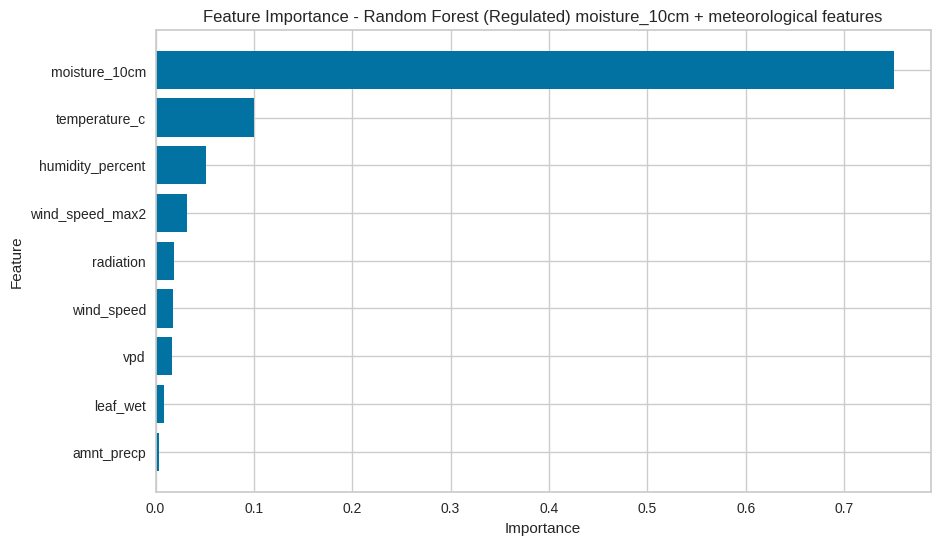

In [ ]:
print("\nFeature importance - Random Forest moisture_10cm + meteorological features:")
feat_imp_rf11 = pd.DataFrame({
    'Feature': X_train_full_10.columns,
    'Importance': rf_full_10cm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf11)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf11['Feature'], feat_imp_rf11['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_10cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##From 20cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_20cm
X_train_20cm_only = train_base[['moisture_20cm']]
y_train_20cm_only = train_base['moisture_30cm']
X_test_20cm_only = test_base[['moisture_20cm']]
y_test_20cm_only = test_base['moisture_30cm']

# Full model (moisture_20cm + meteorological features)
features_to_exclude_30_from_20 = ['moisture_10cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_20 = train_base.drop(columns=features_to_exclude_30_from_20)
y_train_full_20 = train_base['moisture_30cm']
X_test_full_20 = test_base.drop(columns=features_to_exclude_30_from_20)
y_test_full_20 = test_base['moisture_30cm']


In [ ]:
# Model using moisture_20cm only
rf_20cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_20cm.fit(X_train_20cm_only, y_train_20cm_only)
y_train_pred_20cm = rf_20cm.predict(X_train_20cm_only)
y_test_pred_20cm = rf_20cm.predict(X_test_20cm_only)

print("\nRandom Forest - moisture_20cm only")
print("Train R2:", r2_score(y_train_20cm_only, y_train_pred_20cm))
print("Test R2:", r2_score(y_test_20cm_only, y_test_pred_20cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_20cm_only, y_train_pred_20cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_20cm_only, y_test_pred_20cm)))


Random Forest - moisture_20cm only
Train R2: 0.8247481803738896
Test R2: 0.8255459669253336
Train RMSE: 0.019418481720825814
Test RMSE: 0.019514852038700917


In [ ]:
# Model using moisture_20cm + meteorological features
rf_full_20cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_20cm.fit(X_train_full_20, y_train_full_20)
y_train_pred_full_20cm = rf_full_20cm.predict(X_train_full_20)
y_test_pred_full_20cm = rf_full_20cm.predict(X_test_full_20)

print("\nRandom Forest - moisture_20cm + meteorological features")
print("Train R2:", r2_score(y_train_full_20, y_train_pred_full_20cm))
print("Test R2:", r2_score(y_test_full_20, y_test_pred_full_20cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_20, y_train_pred_full_20cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_20, y_test_pred_full_20cm)))


Random Forest - moisture_20cm + meteorological features
Train R2: 0.9969753092777441
Test R2: 0.9790474770014828
Train RMSE: 0.0025510824185986675
Test RMSE: 0.006763054992353307


In [ ]:
#REGULATED
# Model using moisture_20cm + meteorological features
rf_full_20cm = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15, min_samples_leaf= 2)
rf_full_20cm.fit(X_train_full_20, y_train_full_20)
y_train_pred_full_20cm = rf_full_20cm.predict(X_train_full_20)
y_test_pred_full_20cm = rf_full_20cm.predict(X_test_full_20)

print("\nRandom Forest - moisture_20cm + meteorological features")
print("Train R2:", r2_score(y_train_full_20, y_train_pred_full_20cm))
print("Test R2:", r2_score(y_test_full_20, y_test_pred_full_20cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_20, y_train_pred_full_20cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_20, y_test_pred_full_20cm)))


Random Forest - moisture_20cm + meteorological features
Train R2: 0.9779078319560054
Test R2: 0.9668006357281105
Train RMSE: 0.006894506281786532
Test RMSE: 0.00851313733574773



Feature importance - Random Forest moisture_20cm + meteorological features:
            Feature  Importance
0     moisture_20cm    0.859741
1     temperature_c    0.061095
2  humidity_percent    0.028651
6   wind_speed_max2    0.015681
5        wind_speed    0.011285
4          leaf_wet    0.008635
8               vpd    0.007119
7         radiation    0.006788
3        amnt_precp    0.001005


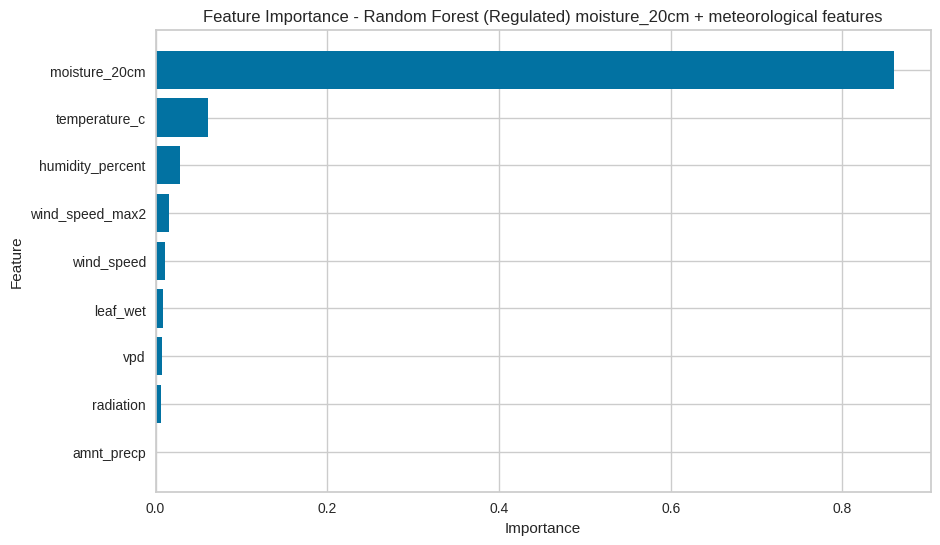

In [ ]:
print("\nFeature importance - Random Forest moisture_20cm + meteorological features:")
feat_imp_rf12 = pd.DataFrame({
    'Feature': X_train_full_20.columns,
    'Importance': rf_full_20cm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf12)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf12['Feature'], feat_imp_rf12['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_20cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 40cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_40cm
X_train_40cm_only = train_base[['moisture_40cm']]
y_train_40cm_only = train_base['moisture_30cm']
X_test_40cm_only = test_base[['moisture_40cm']]
y_test_40cm_only = test_base['moisture_30cm']

# Full model (moisture_40cm + meteorological features)
features_to_exclude_30_from_40 = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_40 = train_base.drop(columns=features_to_exclude_30_from_40)
y_train_full_40 = train_base['moisture_30cm']
X_test_full_40 = test_base.drop(columns=features_to_exclude_30_from_40)
y_test_full_40 = test_base['moisture_30cm']

In [ ]:
# Model using moisture_40cm only
rf_40cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_40cm.fit(X_train_40cm_only, y_train_40cm_only)
y_train_pred_40cm = rf_40cm.predict(X_train_40cm_only)
y_test_pred_40cm = rf_40cm.predict(X_test_40cm_only)

print("\nRandom Forest - moisture_40cm only")
print("Train R2:", r2_score(y_train_40cm_only, y_train_pred_40cm))
print("Test R2:", r2_score(y_test_40cm_only, y_test_pred_40cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_40cm_only, y_train_pred_40cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_40cm_only, y_test_pred_40cm)))


Random Forest - moisture_40cm only
Train R2: 0.9282655774646243
Test R2: 0.9309994003510387
Train RMSE: 0.012423609893452396
Test RMSE: 0.012273012831932288


In [ ]:
# Model using moisture_40cm + meteorological features
rf_full_40 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_40.fit(X_train_full_40, y_train_full_40)
y_train_pred_full_40 = rf_full_40.predict(X_train_full_40)
y_test_pred_full_40 = rf_full_40.predict(X_test_full_40)

print("\nRandom Forest - moisture_40cm + meteorological features")
print("Train R2:", r2_score(y_train_full_40, y_train_pred_full_40))
print("Test R2:", r2_score(y_test_full_40, y_test_pred_full_40))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_40, y_train_pred_full_40)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_40, y_test_pred_full_40)))


Random Forest - moisture_40cm + meteorological features
Train R2: 0.9978624735134615
Test R2: 0.9860402554340261
Train RMSE: 0.0021445676723307167
Test RMSE: 0.005520310316105089


In [ ]:
#REGULATED
# Model using moisture_40cm + meteorological features
rf_full_40 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15, min_samples_leaf= 2)
rf_full_40.fit(X_train_full_40, y_train_full_40)
y_train_pred_full_40 = rf_full_40.predict(X_train_full_40)
y_test_pred_full_40 = rf_full_40.predict(X_test_full_40)

print("\nRandom Forest - moisture_40cm + meteorological features")
print("Train R2:", r2_score(y_train_full_40, y_train_pred_full_40))
print("Test R2:", r2_score(y_test_full_40, y_test_pred_full_40))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_40, y_train_pred_full_40)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_40, y_test_pred_full_40)))


Random Forest - moisture_40cm + meteorological features
Train R2: 0.9865759974630427
Test R2: 0.9806283467365258
Train RMSE: 0.005374338482965734
Test RMSE: 0.00650291532806194



Feature importance - Random Forest moisture_40cm + meteorological features:
            Feature  Importance
0     moisture_40cm    0.947710
1     temperature_c    0.020297
2  humidity_percent    0.012095
6   wind_speed_max2    0.005692
7         radiation    0.005228
5        wind_speed    0.003879
8               vpd    0.002639
4          leaf_wet    0.001633
3        amnt_precp    0.000826


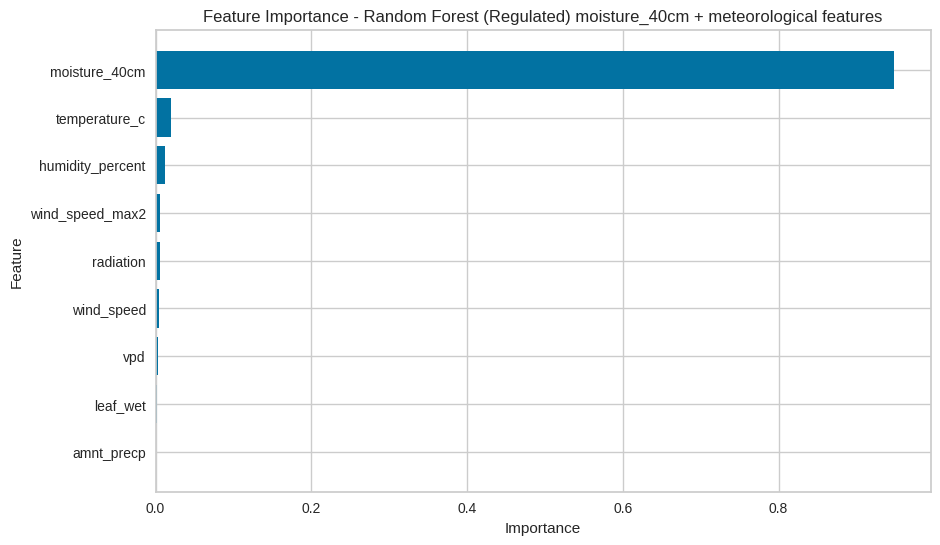

In [ ]:
print("\nFeature importance - Random Forest moisture_40cm + meteorological features:")
feat_imp_rf13 = pd.DataFrame({
    'Feature': X_train_full_40.columns,
    'Importance': rf_full_40.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf13)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf13['Feature'], feat_imp_rf13['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_40cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##From 50cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_50cm
X_train_50cm_only = train_base[['moisture_50cm']]
y_train_50cm_only = train_base['moisture_30cm']
X_test_50cm_only = test_base[['moisture_50cm']]
y_test_50cm_only = test_base['moisture_30cm']

# Full model (moisture_50cm + meteorological features)
features_to_exclude_30_from_50 = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device']
X_train_full_50 = train_base.drop(columns=features_to_exclude_30_from_50)
y_train_full_50 = train_base['moisture_30cm']
X_test_full_50 = test_base.drop(columns=features_to_exclude_30_from_50)
y_test_full_50 = test_base['moisture_30cm']

In [ ]:
# Model using moisture_50cm only
rf_50cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_50cm.fit(X_train_50cm_only, y_train_50cm_only)
y_train_pred_50cm = rf_50cm.predict(X_train_50cm_only)
y_test_pred_50cm = rf_50cm.predict(X_test_50cm_only)

print("\nRandom Forest - moisture_50cm only")
print("Train R2:", r2_score(y_train_50cm_only, y_train_pred_50cm))
print("Test R2:", r2_score(y_test_50cm_only, y_test_pred_50cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_50cm_only, y_train_pred_50cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_50cm_only, y_test_pred_50cm)))


Random Forest - moisture_50cm only
Train R2: 0.865779991228188
Test R2: 0.8697278146799999
Train RMSE: 0.01699388339790358
Test RMSE: 0.01686361214386376


In [ ]:
# Model using moisture_50cm + meteorological features
rf_full_50 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_50.fit(X_train_full_50, y_train_full_50)
y_train_pred_full_50 = rf_full_50.predict(X_train_full_50)
y_test_pred_full_50 = rf_full_50.predict(X_test_full_50)

print("\nRandom Forest - moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_50, y_train_pred_full_50))
print("Test R2:", r2_score(y_test_full_50, y_test_pred_full_50))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_50, y_train_pred_full_50)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_50, y_test_pred_full_50)))


Random Forest - moisture_50cm + meteorological features
Train R2: 0.9962052768170553
Test R2: 0.9746057435836277
Train RMSE: 0.0028574198204428195
Test RMSE: 0.007445476651719644



Feature importance - Random Forest moisture_50cm + meteorological features:
            Feature  Importance
0     moisture_50cm    0.892599
1     temperature_c    0.039719
2  humidity_percent    0.024735
6   wind_speed_max2    0.012308
4          leaf_wet    0.009074
7         radiation    0.008462
5        wind_speed    0.006465
8               vpd    0.005657
3        amnt_precp    0.000981


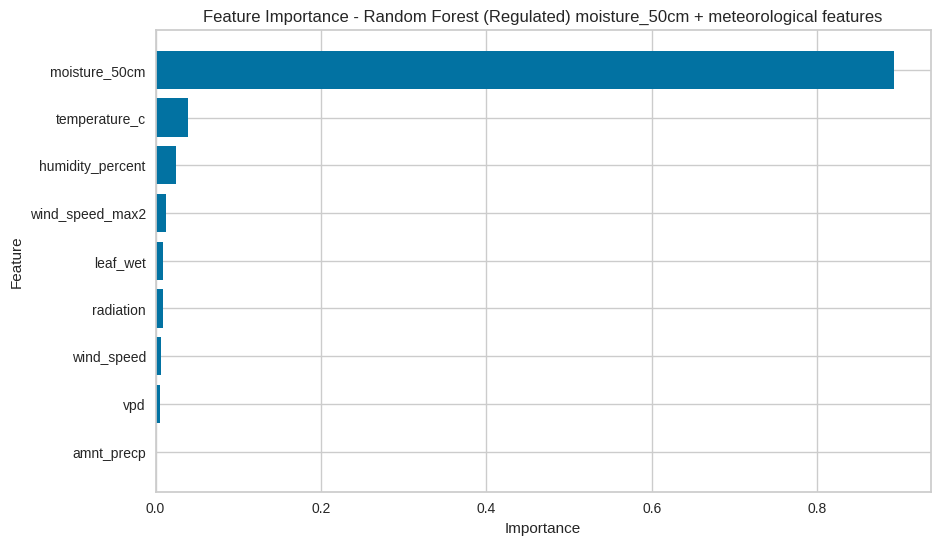

In [ ]:
print("\nFeature importance - Random Forest moisture_50cm + meteorological features:")
feat_imp_rf14 = pd.DataFrame({
    'Feature': X_train_full_50.columns,
    'Importance': rf_full_50.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf14)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf14['Feature'], feat_imp_rf14['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_50cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##FRom 60cm

In [ ]:
# ==== 1. Separate features and targets for predicting 30 from 60 ====

# Model using only moisture_60cm
X_train_60cm_only = train_base[['moisture_60cm']]
y_train_60cm_only = train_base['moisture_30cm']
X_test_60cm_only = test_base[['moisture_60cm']]
y_test_60cm_only = test_base['moisture_30cm']

# Full model (moisture_60cm + meteorological features)
features_to_exclude_30_from_60 = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'timestamp_device']
X_train_full_60 = train_base.drop(columns=features_to_exclude_30_from_60)
y_train_full_60 = train_base['moisture_30cm']
X_test_full_60 = test_base.drop(columns=features_to_exclude_30_from_60)
y_test_full_60 = test_base['moisture_30cm']


In [ ]:
# Model using only moisture_60cm
rf_60cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_60cm.fit(X_train_60cm_only, y_train_60cm_only)
y_train_pred_60cm = rf_60cm.predict(X_train_60cm_only)
y_test_pred_60cm = rf_60cm.predict(X_test_60cm_only)

print("\nRandom Forest - moisture_60cm only")
print("Train R2:", r2_score(y_train_60cm_only, y_train_pred_60cm))
print("Test R2:", r2_score(y_test_60cm_only, y_test_pred_60cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_60cm_only, y_train_pred_60cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_60cm_only, y_test_pred_60cm)))


Random Forest - moisture_60cm only
Train R2: 0.7042997562873812
Test R2: 0.708673132852906
Train RMSE: 0.025223761064973895
Test RMSE: 0.025218254605750084


In [ ]:
# Model using moisture_60cm + meteorological features
rf_full_60 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_60.fit(X_train_full_60, y_train_full_60)
y_train_pred_full_60 = rf_full_60.predict(X_train_full_60)
y_test_pred_full_60 = rf_full_60.predict(X_test_full_60)

print("\nRandom Forest - moisture_60cm + meteorological features")
print("Train R2:", r2_score(y_train_full_60, y_train_pred_full_60))
print("Test R2:", r2_score(y_test_full_60, y_test_pred_full_60))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_60, y_train_pred_full_60)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_60, y_test_pred_full_60)))


Random Forest - moisture_60cm + meteorological features
Train R2: 0.9932069644472872
Test R2: 0.9546853687782089
Train RMSE: 0.0038231025395667343
Test RMSE: 0.0099458975367


In [ ]:
#REGULATED
# Model using moisture_60cm + meteorological features
rf_full_60 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15, min_samples_split= 2)
rf_full_60.fit(X_train_full_60, y_train_full_60)
y_train_pred_full_60 = rf_full_60.predict(X_train_full_60)
y_test_pred_full_60 = rf_full_60.predict(X_test_full_60)

print("\nRandom Forest - moisture_60cm + meteorological features")
print("Train R2:", r2_score(y_train_full_60, y_train_pred_full_60))
print("Test R2:", r2_score(y_test_full_60, y_test_pred_full_60))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_60, y_train_pred_full_60)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_60, y_test_pred_full_60)))


Random Forest - moisture_60cm + meteorological features
Train R2: 0.9590671880993751
Test R2: 0.9378231684568441
Train RMSE: 0.009384686999502397
Test RMSE: 0.011650352058372273



Feature importance - Random Forest moisture_60cm + meteorological features:
            Feature  Importance
0     moisture_60cm    0.750027
1     temperature_c    0.131680
2  humidity_percent    0.040559
6   wind_speed_max2    0.016789
8               vpd    0.016585
7         radiation    0.014324
4          leaf_wet    0.014271
5        wind_speed    0.011855
3        amnt_precp    0.003910


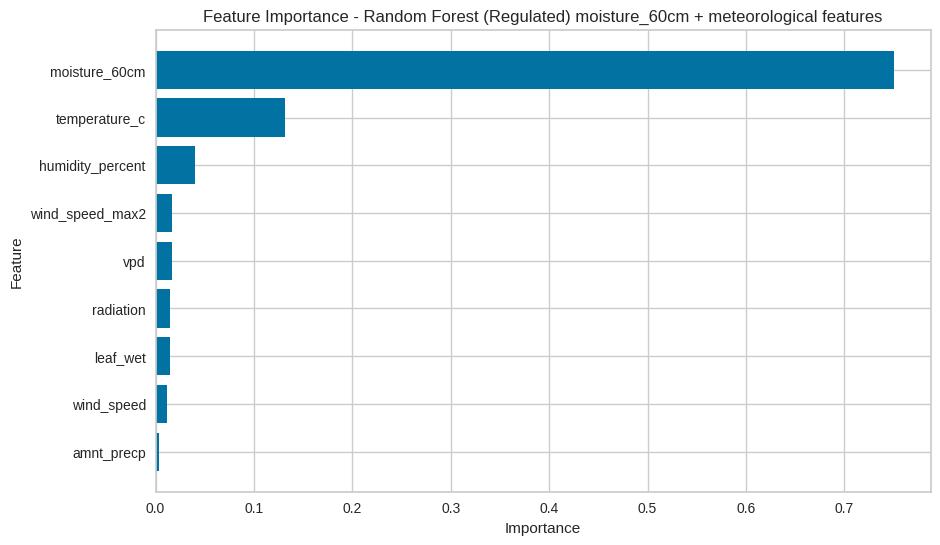

In [ ]:
print("\nFeature importance - Random Forest moisture_60cm + meteorological features:")
feat_imp_rf15 = pd.DataFrame({
    'Feature': X_train_full_60.columns,
    'Importance': rf_full_60.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf15)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf15['Feature'], feat_imp_rf15['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_60cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##Predicting moisture at 40cm depth

##from 10cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_10cm
X_train_10cm_only = train_base[['moisture_10cm']]
y_train_10cm_only = train_base['moisture_40cm']
X_test_10cm_only = test_base[['moisture_10cm']]
y_test_10cm_only = test_base['moisture_40cm']

# Full model (moisture_10cm + meteorological features)
features_to_exclude_40_from_10 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_10 = train_base.drop(columns=features_to_exclude_40_from_10)
y_train_full_10 = train_base['moisture_40cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_40_from_10)
y_test_full_10 = test_base['moisture_40cm']

In [ ]:
# Model using only moisture_10cm
rf_10cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_10cm.fit(X_train_10cm_only, y_train_10cm_only)
y_train_pred_10cm = rf_10cm.predict(X_train_10cm_only)
y_test_pred_10cm = rf_10cm.predict(X_test_10cm_only)

print("\nRandom Forest - moisture_10cm only")
print("Train R2:", r2_score(y_train_10cm_only, y_train_pred_10cm))
print("Test R2:", r2_score(y_test_10cm_only, y_test_pred_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_10cm_only, y_train_pred_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_10cm_only, y_test_pred_10cm)))


Random Forest - moisture_10cm only
Train R2: 0.45302271811556105
Test R2: 0.44951458159289903
Train RMSE: 0.025401752541403456
Test RMSE: 0.025706877939712103


In [ ]:
# Model using moisture_10cm + meteorological features
rf_full_10 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_10.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10 = rf_full_10.predict(X_train_full_10)
y_test_pred_full_10 = rf_full_10.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10)))


Random Forest - moisture_10cm + meteorological features
Train R2: 0.9873057159709406
Test R2: 0.9163655951681875
Train RMSE: 0.003869752078197743
Test RMSE: 0.010020027443225136


In [ ]:
#REGULATED
# Model using moisture_10cm + meteorological features
rf_full_10 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15)
rf_full_10.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10 = rf_full_10.predict(X_train_full_10)
y_test_pred_full_10 = rf_full_10.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10)))


Random Forest - moisture_10cm + meteorological features
Train R2: 0.8858055797740879
Test R2: 0.847592278942263
Train RMSE: 0.011606505418313344
Test RMSE: 0.013526327869388703



Feature importance - Random Forest moisture_10cm + meteorological features:
            Feature  Importance
0     moisture_10cm    0.603585
1     temperature_c    0.170104
2  humidity_percent    0.074225
6   wind_speed_max2    0.035489
5        wind_speed    0.034436
4          leaf_wet    0.031918
7         radiation    0.026558
8               vpd    0.015960
3        amnt_precp    0.007725


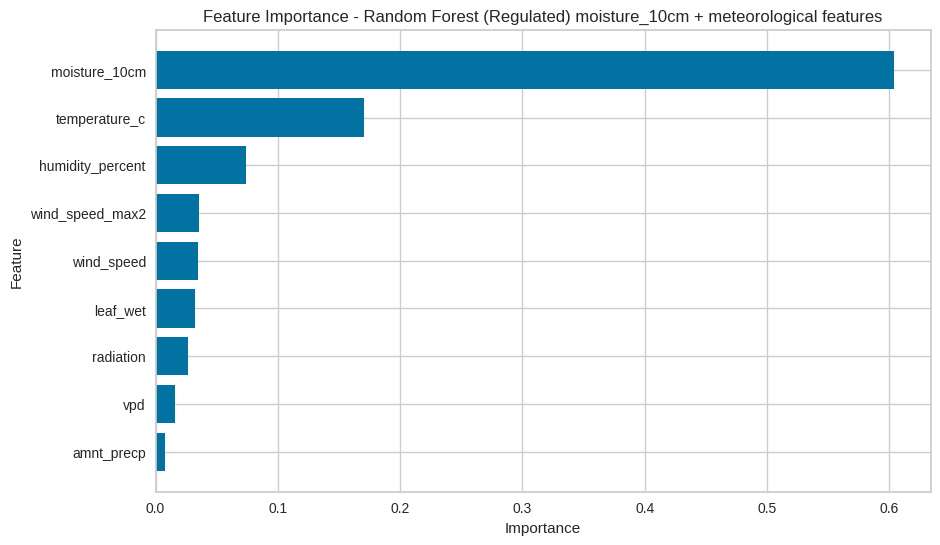

In [ ]:
print("\nFeature importance - Random Forest moisture_10cm + meteorological features:")
feat_imp_rf16 = pd.DataFrame({
    'Feature': X_train_full_10.columns,
    'Importance': rf_full_10.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf16)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf16['Feature'], feat_imp_rf16['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_10cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 20cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_20cm
X_train_20cm_only = train_base[['moisture_20cm']]
y_train_20cm_only = train_base['moisture_40cm']
X_test_20cm_only = test_base[['moisture_20cm']]
y_test_20cm_only = test_base['moisture_40cm']

# Full model (moisture_20cm + meteorological features)
features_to_exclude_40_from_20 = ['moisture_10cm', 'moisture_40cm', 'moisture_30cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_20 = train_base.drop(columns=features_to_exclude_40_from_20)
y_train_full_20 = train_base['moisture_40cm']
X_test_full_20 = test_base.drop(columns=features_to_exclude_40_from_20)
y_test_full_20 = test_base['moisture_40cm']

In [ ]:
# Model using only moisture_20cm
rf_20cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_20cm.fit(X_train_20cm_only, y_train_20cm_only)
y_train_pred_20cm = rf_20cm.predict(X_train_20cm_only)
y_test_pred_20cm = rf_20cm.predict(X_test_20cm_only)

print("\nRandom Forest - moisture_20cm only")
print("Train R2:", r2_score(y_train_20cm_only, y_train_pred_20cm))
print("Test R2:", r2_score(y_test_20cm_only, y_test_pred_20cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_20cm_only, y_train_pred_20cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_20cm_only, y_test_pred_20cm)))


Random Forest - moisture_20cm only
Train R2: 0.6656526288595759
Test R2: 0.6712253514698918
Train RMSE: 0.01985994278298842
Test RMSE: 0.019866693277158277


In [ ]:
# Model using moisture_20cm + meteorological features
rf_full_20 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_20.fit(X_train_full_20, y_train_full_20)
y_train_pred_full_20 = rf_full_20.predict(X_train_full_20)
y_test_pred_full_20 = rf_full_20.predict(X_test_full_20)

print("\nRandom Forest - moisture_20cm + meteorological features")
print("Train R2:", r2_score(y_train_full_20, y_train_pred_full_20))
print("Test R2:", r2_score(y_test_full_20, y_test_pred_full_20))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_20, y_train_pred_full_20)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_20, y_test_pred_full_20)))


Random Forest - moisture_20cm + meteorological features
Train R2: 0.9929112203997512
Test R2: 0.9523068314541456
Train RMSE: 0.0028917768282413782
Test RMSE: 0.0075666651209691385


In [ ]:
#REGULATED
# Model using moisture_20cm + meteorological features
rf_full_20 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15)
rf_full_20.fit(X_train_full_20, y_train_full_20)
y_train_pred_full_20 = rf_full_20.predict(X_train_full_20)
y_test_pred_full_20 = rf_full_20.predict(X_test_full_20)

print("\nRandom Forest - moisture_20cm + meteorological features")
print("Train R2:", r2_score(y_train_full_20, y_train_pred_full_20))
print("Test R2:", r2_score(y_test_full_20, y_test_pred_full_20))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_20, y_train_pred_full_20)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_20, y_test_pred_full_20)))


Random Forest - moisture_20cm + meteorological features
Train R2: 0.9421421155467778
Test R2: 0.9200207466381294
Train RMSE: 0.00826152671269611
Test RMSE: 0.009798624123799537



Feature importance - Random Forest moisture_20cm + meteorological features:
            Feature  Importance
0     moisture_20cm    0.750361
1     temperature_c    0.115315
2  humidity_percent    0.051587
5        wind_speed    0.018622
6   wind_speed_max2    0.018611
7         radiation    0.016485
4          leaf_wet    0.015506
8               vpd    0.010579
3        amnt_precp    0.002934


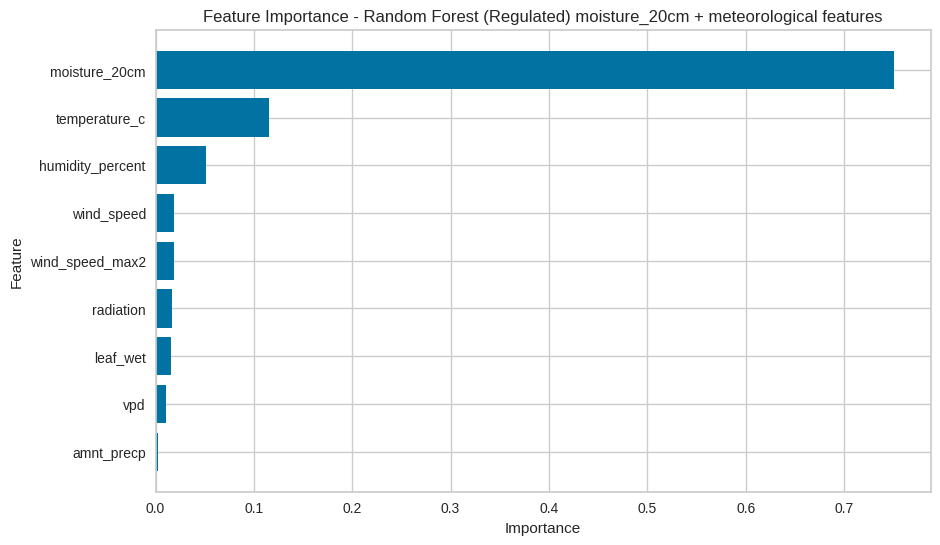

In [ ]:
print("\nFeature importance - Random Forest moisture_20cm + meteorological features:")
feat_imp_rf17 = pd.DataFrame({
    'Feature': X_train_full_20.columns,
    'Importance': rf_full_20.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf17)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf17['Feature'], feat_imp_rf17['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_20cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 30cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_30cm
X_train_30cm_only = train_base[['moisture_30cm']]
y_train_30cm_only = train_base['moisture_40cm']
X_test_30cm_only = test_base[['moisture_30cm']]
y_test_30cm_only = test_base['moisture_40cm']

# Full model (moisture_30cm + meteorological features)
features_to_exclude_40_from_30 = ['moisture_10cm', 'moisture_20cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_30 = train_base.drop(columns=features_to_exclude_40_from_30)
y_train_full_30 = train_base['moisture_40cm']
X_test_full_30 = test_base.drop(columns=features_to_exclude_40_from_30)
y_test_full_30 = test_base['moisture_40cm']


In [ ]:
# Model using only moisture_30cm
rf_30cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_30cm.fit(X_train_30cm_only, y_train_30cm_only)
y_train_pred_30cm = rf_30cm.predict(X_train_30cm_only)
y_test_pred_30cm = rf_30cm.predict(X_test_30cm_only)

print("\nRandom Forest - moisture_30cm only")
print("Train R2:", r2_score(y_train_30cm_only, y_train_pred_30cm))
print("Test R2:", r2_score(y_test_30cm_only, y_test_pred_30cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_30cm_only, y_train_pred_30cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_30cm_only, y_test_pred_30cm)))


Random Forest - moisture_30cm only
Train R2: 0.9018998471415451
Test R2: 0.9031075511718449
Train RMSE: 0.01075756251533877
Test RMSE: 0.01078503085173532


In [ ]:
# Model using moisture_30cm + meteorological features
rf_full_30 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_30.fit(X_train_full_30, y_train_full_30)
y_train_pred_full_30 = rf_full_30.predict(X_train_full_30)
y_test_pred_full_30 = rf_full_30.predict(X_test_full_30)

print("\nRandom Forest - moisture_30cm + meteorological features")
print("Train R2:", r2_score(y_train_full_30, y_train_pred_full_30))
print("Test R2:", r2_score(y_test_full_30, y_test_pred_full_30))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_30, y_train_pred_full_30)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_30, y_test_pred_full_30)))


Random Forest - moisture_30cm + meteorological features
Train R2: 0.9972402691825745
Test R2: 0.9816252467509594
Train RMSE: 0.001804315160251721
Test RMSE: 0.004696639037231247


In [ ]:
#REGULATED
# Model using moisture_30cm + meteorological features
rf_full_30 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15)
rf_full_30.fit(X_train_full_30, y_train_full_30)
y_train_pred_full_30 = rf_full_30.predict(X_train_full_30)
y_test_pred_full_30 = rf_full_30.predict(X_test_full_30)

print("\nRandom Forest - moisture_30cm + meteorological features")
print("Train R2:", r2_score(y_train_full_30, y_train_pred_full_30))
print("Test R2:", r2_score(y_test_full_30, y_test_pred_full_30))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_30, y_train_pred_full_30)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_30, y_test_pred_full_30)))


Random Forest - moisture_30cm + meteorological features
Train R2: 0.9849112937452488
Test R2: 0.9753364766153868
Train RMSE: 0.0042189564113468
Test RMSE: 0.0054413164674735085



Feature importance - Random Forest moisture_30cm + meteorological features:
            Feature  Importance
0     moisture_30cm    0.931245
1     temperature_c    0.027879
2  humidity_percent    0.012727
5        wind_speed    0.009605
7         radiation    0.005282
6   wind_speed_max2    0.004166
4          leaf_wet    0.004125
8               vpd    0.003947
3        amnt_precp    0.001025


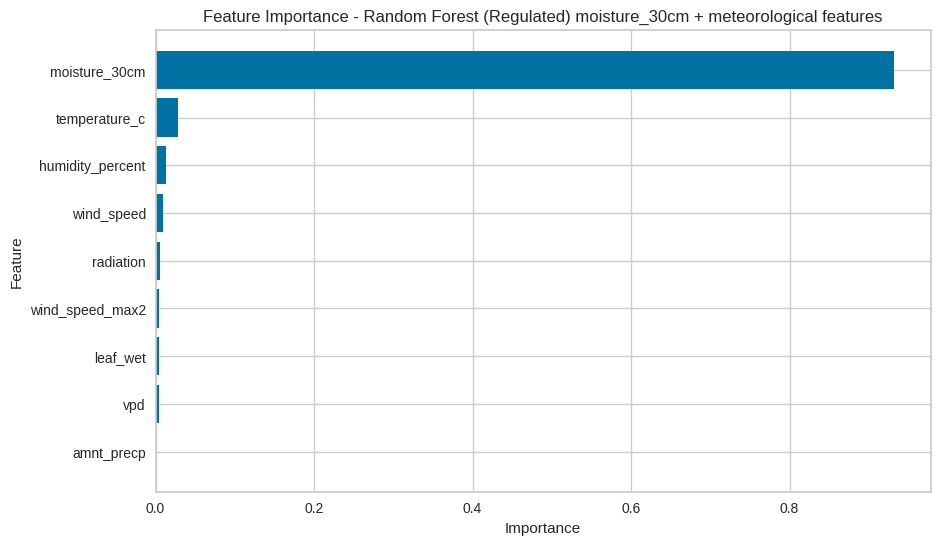

In [ ]:
print("\nFeature importance - Random Forest moisture_30cm + meteorological features:")
feat_imp_rf18 = pd.DataFrame({
    'Feature': X_train_full_30.columns,
    'Importance': rf_full_30.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf18)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf18['Feature'], feat_imp_rf18['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_30cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 50cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_50cm
X_train_50cm_only = train_base[['moisture_50cm']]
y_train_50cm_only = train_base['moisture_40cm']
X_test_50cm_only = test_base[['moisture_50cm']]
y_test_50cm_only = test_base['moisture_40cm']

# Full model (moisture_50cm + meteorological features)
features_to_exclude_40_from_50 = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device']
X_train_full_50 = train_base.drop(columns=features_to_exclude_40_from_50)
y_train_full_50 = train_base['moisture_40cm']
X_test_full_50 = test_base.drop(columns=features_to_exclude_40_from_50)
y_test_full_50 = test_base['moisture_40cm']


In [ ]:
# Model using only moisture_50cm
rf_50cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_50cm.fit(X_train_50cm_only, y_train_50cm_only)
y_train_pred_50cm = rf_50cm.predict(X_train_50cm_only)
y_test_pred_50cm = rf_50cm.predict(X_test_50cm_only)

print("\nRandom Forest - moisture_50cm only")
print("Train R2:", r2_score(y_train_50cm_only, y_train_pred_50cm))
print("Test R2:", r2_score(y_test_50cm_only, y_test_pred_50cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_50cm_only, y_train_pred_50cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_50cm_only, y_test_pred_50cm)))


Random Forest - moisture_50cm only
Train R2: 0.8768872255651341
Test R2: 0.8815321736150893
Train RMSE: 0.012051208374803894
Test RMSE: 0.011925501071453848


In [ ]:
# Model using moisture_50cm + meteorological features
rf_full_50 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_50.fit(X_train_full_50, y_train_full_50)
y_train_pred_full_50 = rf_full_50.predict(X_train_full_50)
y_test_pred_full_50 = rf_full_50.predict(X_test_full_50)

print("\nRandom Forest - moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_50, y_train_pred_full_50))
print("Test R2:", r2_score(y_test_full_50, y_test_pred_full_50))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_50, y_train_pred_full_50)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_50, y_test_pred_full_50)))


Random Forest - moisture_50cm + meteorological features
Train R2: 0.9962661819341997
Test R2: 0.9740152188490725
Train RMSE: 0.0020987253721087675
Test RMSE: 0.005585164351559717



Feature importance - Random Forest moisture_50cm + meteorological features:
            Feature  Importance
0     moisture_50cm    0.900769
1     temperature_c    0.033870
2  humidity_percent    0.015900
5        wind_speed    0.013344
4          leaf_wet    0.011010
6   wind_speed_max2    0.008766
8               vpd    0.007878
7         radiation    0.007290
3        amnt_precp    0.001172


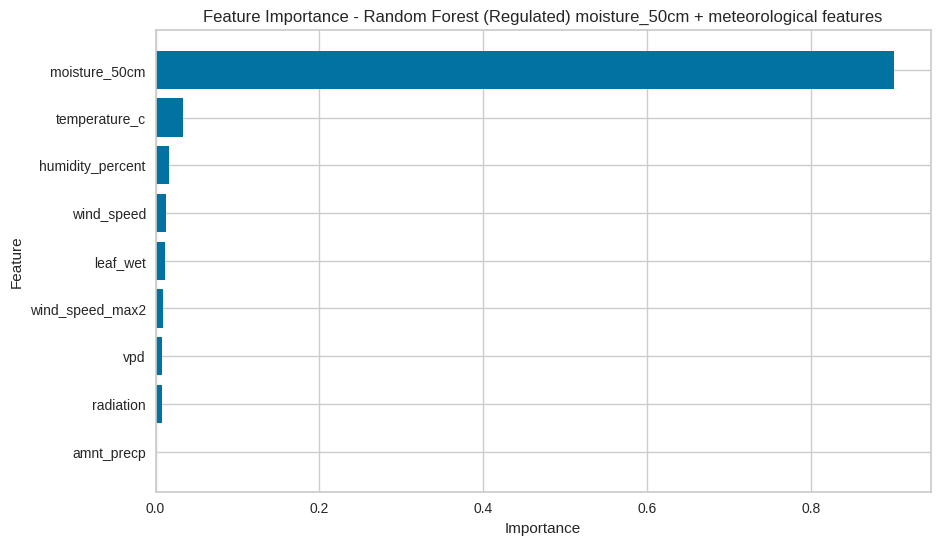

In [ ]:
print("\nFeature importance - Random Forest moisture_50cm + meteorological features:")
feat_imp_rf19 = pd.DataFrame({
    'Feature': X_train_full_50.columns,
    'Importance': rf_full_50.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf19)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf19['Feature'], feat_imp_rf19['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_50cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 60cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_60cm
X_train_60cm_only = train_base[['moisture_60cm']]
y_train_60cm_only = train_base['moisture_40cm']
X_test_60cm_only = test_base[['moisture_60cm']]
y_test_60cm_only = test_base['moisture_40cm']

# Full model (moisture_60cm + meteorological features)
features_to_exclude_40_from_60 = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'timestamp_device']
X_train_full_60 = train_base.drop(columns=features_to_exclude_40_from_60)
y_train_full_60 = train_base['moisture_40cm']
X_test_full_60 = test_base.drop(columns=features_to_exclude_40_from_60)
y_test_full_60 = test_base['moisture_40cm']

In [ ]:
# Model using only moisture_60cm
rf_60cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_60cm.fit(X_train_60cm_only, y_train_60cm_only)
y_train_pred_60cm = rf_60cm.predict(X_train_60cm_only)
y_test_pred_60cm = rf_60cm.predict(X_test_60cm_only)

print("\nRandom Forest - moisture_60cm only")
print("Train R2:", r2_score(y_train_60cm_only, y_train_pred_60cm))
print("Test R2:", r2_score(y_test_60cm_only, y_test_pred_60cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_60cm_only, y_train_pred_60cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_60cm_only, y_test_pred_60cm)))


Random Forest - moisture_60cm only
Train R2: 0.6736891466918538
Test R2: 0.6828215446119439
Train RMSE: 0.019619809940391947
Test RMSE: 0.019513189652837375


In [ ]:
# Model using moisture_60cm + meteorological features
rf_full_60 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_60.fit(X_train_full_60, y_train_full_60)
y_train_pred_full_60 = rf_full_60.predict(X_train_full_60)
y_test_pred_full_60 = rf_full_60.predict(X_test_full_60)

print("\nRandom Forest - moisture_60cm + meteorological features")
print("Train R2:", r2_score(y_train_full_60, y_train_pred_full_60))
print("Test R2:", r2_score(y_test_full_60, y_test_pred_full_60))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_60, y_train_pred_full_60)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_60, y_test_pred_full_60)))


Random Forest - moisture_60cm + meteorological features
Train R2: 0.99116378523364
Test R2: 0.940978761031026
Train RMSE: 0.003228584578522708
Test RMSE: 0.008417450800111699


In [ ]:
#REGULATED
# Model using moisture_60cm + meteorological features
rf_full_60 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15)
rf_full_60.fit(X_train_full_60, y_train_full_60)
y_train_pred_full_60 = rf_full_60.predict(X_train_full_60)
y_test_pred_full_60 = rf_full_60.predict(X_test_full_60)

print("\nRandom Forest - moisture_60cm + meteorological features")
print("Train R2:", r2_score(y_train_full_60, y_train_pred_full_60))
print("Test R2:", r2_score(y_test_full_60, y_test_pred_full_60))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_60, y_train_pred_full_60)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_60, y_test_pred_full_60)))


Random Forest - moisture_60cm + meteorological features
Train R2: 0.9484600609771066
Test R2: 0.9209785697106118
Train RMSE: 0.007797421060226513
Test RMSE: 0.009739773753976822



Feature importance - Random Forest moisture_60cm + meteorological features:
            Feature  Importance
0     moisture_60cm    0.746743
1     temperature_c    0.111237
2  humidity_percent    0.041482
4          leaf_wet    0.023760
5        wind_speed    0.020760
6   wind_speed_max2    0.017609
8               vpd    0.017478
7         radiation    0.017150
3        amnt_precp    0.003782


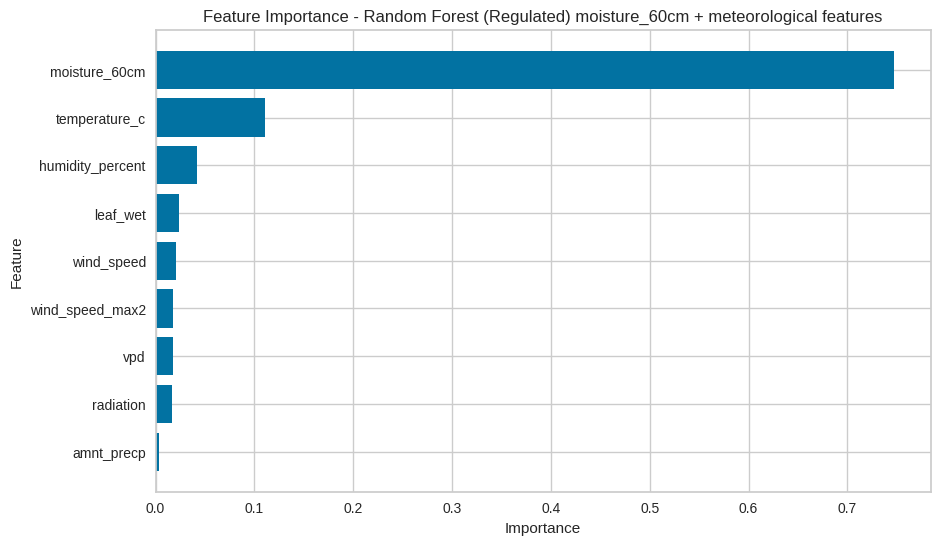

In [ ]:
print("\nFeature importance - Random Forest moisture_60cm + meteorological features:")
feat_imp_rf20 = pd.DataFrame({
    'Feature': X_train_full_60.columns,
    'Importance': rf_full_60.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf20)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf20['Feature'], feat_imp_rf20['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_60cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##Predicting moisture at 50cm depth

##from 10cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_10cm
X_train_10cm_only = train_base[['moisture_10cm']]
y_train_10cm_only = train_base['moisture_50cm']
X_test_10cm_only = test_base[['moisture_10cm']]
y_test_10cm_only = test_base['moisture_50cm']

# Full model (moisture_10cm + meteorological features)
features_to_exclude_50_from_10 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_10 = train_base.drop(columns=features_to_exclude_50_from_10)
y_train_full_10 = train_base['moisture_50cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_50_from_10)
y_test_full_10 = test_base['moisture_50cm']

In [ ]:
# Model using only moisture_10cm
rf_10cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_10cm.fit(X_train_10cm_only, y_train_10cm_only)
y_train_pred_10cm = rf_10cm.predict(X_train_10cm_only)
y_test_pred_10cm = rf_10cm.predict(X_test_10cm_only)

print("\nRandom Forest - moisture_10cm only")
print("Train R2:", r2_score(y_train_10cm_only, y_train_pred_10cm))
print("Test R2:", r2_score(y_test_10cm_only, y_test_pred_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_10cm_only, y_train_pred_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_10cm_only, y_test_pred_10cm)))


Random Forest - moisture_10cm only
Train R2: 0.46098132857091156
Test R2: 0.4542946478598675
Train RMSE: 0.010355172855516525
Test RMSE: 0.010552237032564851


In [ ]:
# Model using moisture_10cm + meteorological features
rf_full_10 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_10.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10 = rf_full_10.predict(X_train_full_10)
y_test_pred_full_10 = rf_full_10.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10)))


Random Forest - moisture_10cm + meteorological features
Train R2: 0.9861863083266551
Test R2: 0.9094484542513808
Train RMSE: 0.001657716755944948
Test RMSE: 0.004298464710507394


In [ ]:
#REGULATED
# Model using moisture_10cm + meteorological features
rf_full_10 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15)
rf_full_10.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10 = rf_full_10.predict(X_train_full_10)
y_test_pred_full_10 = rf_full_10.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10)))


Random Forest - moisture_10cm + meteorological features
Train R2: 0.9023341332298467
Test R2: 0.8511531440115343
Train RMSE: 0.004407850462653658
Test RMSE: 0.005511061586674737



Feature importance - Random Forest moisture_10cm + meteorological features:
            Feature  Importance
0     moisture_10cm    0.593147
1     temperature_c    0.171406
2  humidity_percent    0.074958
6   wind_speed_max2    0.042914
5        wind_speed    0.038933
7         radiation    0.031082
4          leaf_wet    0.022630
8               vpd    0.020069
3        amnt_precp    0.004861


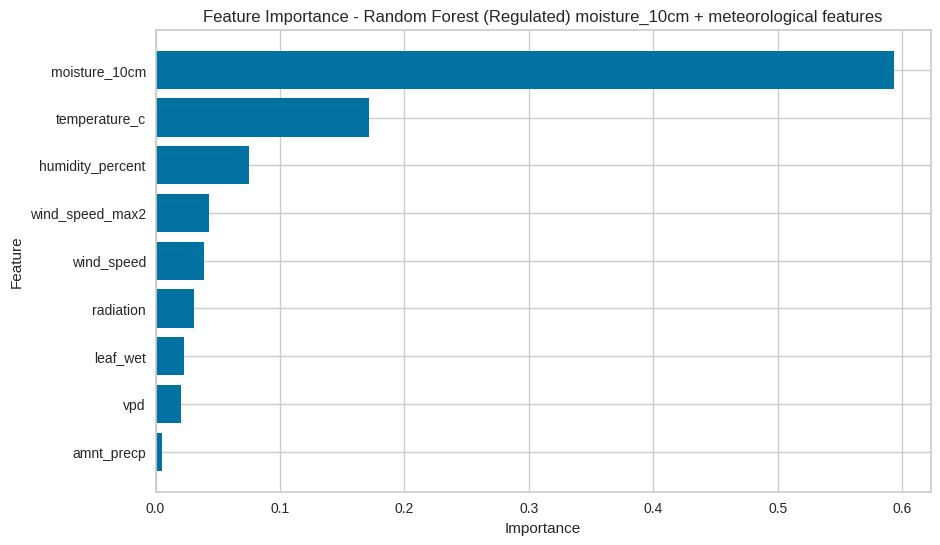

In [ ]:
print("\nFeature importance - Random Forest moisture_10cm + meteorological features:")
feat_imp_rf21 = pd.DataFrame({
    'Feature': X_train_full_10.columns,
    'Importance': rf_full_10.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf21)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf21['Feature'], feat_imp_rf21['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_10cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 20cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_20cm
X_train_20cm_only = train_base[['moisture_20cm']]
y_train_20cm_only = train_base['moisture_50cm']
X_test_20cm_only = test_base[['moisture_20cm']]
y_test_20cm_only = test_base['moisture_50cm']

# Full model (moisture_20cm + meteorological features)
features_to_exclude_50_from_20 = ['moisture_10cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_20 = train_base.drop(columns=features_to_exclude_50_from_20)
y_train_full_20 = train_base['moisture_50cm']
X_test_full_20 = test_base.drop(columns=features_to_exclude_50_from_20)
y_test_full_20 = test_base['moisture_50cm']

In [ ]:
# Model using only moisture_20cm
rf_20cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_20cm.fit(X_train_20cm_only, y_train_20cm_only)
y_train_pred_20cm = rf_20cm.predict(X_train_20cm_only)
y_test_pred_20cm = rf_20cm.predict(X_test_20cm_only)

print("\nRandom Forest - moisture_20cm only")
print("Train R2:", r2_score(y_train_20cm_only, y_train_pred_20cm))
print("Test R2:", r2_score(y_test_20cm_only, y_test_pred_20cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_20cm_only, y_train_pred_20cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_20cm_only, y_test_pred_20cm)))


Random Forest - moisture_20cm only
Train R2: 0.6769278512499723
Test R2: 0.6789502625575095
Train RMSE: 0.008016876775814755
Test RMSE: 0.008093783643910049


In [ ]:
# Model using moisture_20cm + meteorological features
rf_full_20 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_20.fit(X_train_full_20, y_train_full_20)
y_train_pred_full_20 = rf_full_20.predict(X_train_full_20)
y_test_pred_full_20 = rf_full_20.predict(X_test_full_20)

print("\nRandom Forest - moisture_20cm + meteorological features")
print("Train R2:", r2_score(y_train_full_20, y_train_pred_full_20))
print("Test R2:", r2_score(y_test_full_20, y_test_pred_full_20))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_20, y_train_pred_full_20)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_20, y_test_pred_full_20)))



Random Forest - moisture_20cm + meteorological features
Train R2: 0.9928580986835182
Test R2: 0.9523395899238437
Train RMSE: 0.0011919618915232886
Test RMSE: 0.0031184897351149484


In [ ]:
#REGULATED
# Model using moisture_20cm + meteorological features
rf_full_20 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15)
rf_full_20.fit(X_train_full_20, y_train_full_20)
y_train_pred_full_20 = rf_full_20.predict(X_train_full_20)
y_test_pred_full_20 = rf_full_20.predict(X_test_full_20)

print("\nRandom Forest - moisture_20cm + meteorological features")
print("Train R2:", r2_score(y_train_full_20, y_train_pred_full_20))
print("Test R2:", r2_score(y_test_full_20, y_test_pred_full_20))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_20, y_train_pred_full_20)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_20, y_test_pred_full_20)))


Random Forest - moisture_20cm + meteorological features
Train R2: 0.9505197000700862
Test R2: 0.9272149777055462
Train RMSE: 0.003137412409078575
Test RMSE: 0.0038537757639274996



Feature importance - Random Forest moisture_20cm + meteorological features:
            Feature  Importance
0     moisture_20cm    0.771818
1     temperature_c    0.088212
2  humidity_percent    0.048270
6   wind_speed_max2    0.026178
5        wind_speed    0.023781
7         radiation    0.015433
4          leaf_wet    0.015429
8               vpd    0.008365
3        amnt_precp    0.002513


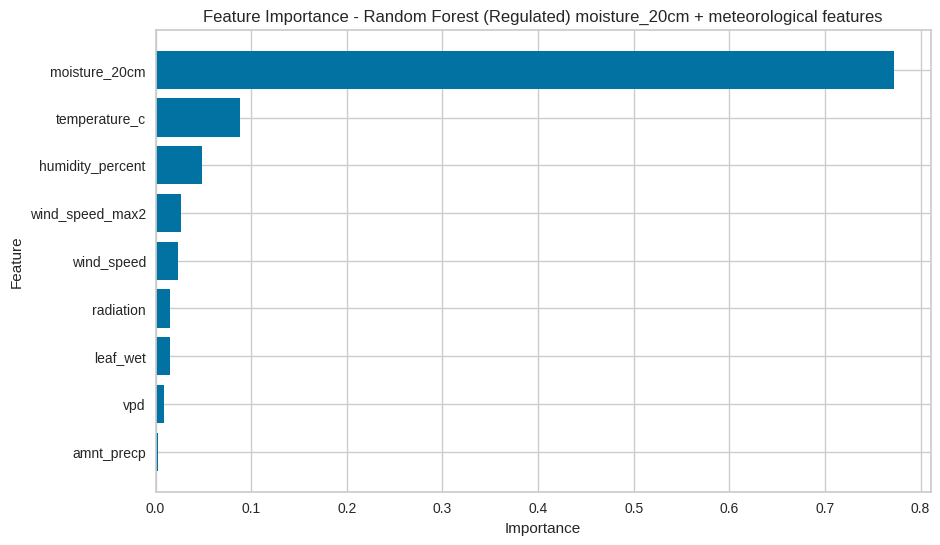

In [ ]:
# 3. Feature importance for moisture_20cm + meteorological features model
print("\nFeature importance - Random Forest moisture_20cm + meteorological features:")
feat_imp_rf22 = pd.DataFrame({
    'Feature': X_train_full_20.columns,
    'Importance': rf_full_20.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf22)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf22['Feature'], feat_imp_rf22['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_20cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 30cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_30cm
X_train_30cm_only = train_base[['moisture_30cm']]
y_train_30cm_only = train_base['moisture_50cm']
X_test_30cm_only = test_base[['moisture_30cm']]
y_test_30cm_only = test_base['moisture_50cm']

# Full model (moisture_30cm + meteorological features)
features_to_exclude_50_from_30 = ['moisture_10cm', 'moisture_20cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_30 = train_base.drop(columns=features_to_exclude_50_from_30)
y_train_full_30 = train_base['moisture_50cm']
X_test_full_30 = test_base.drop(columns=features_to_exclude_50_from_30)
y_test_full_30 = test_base['moisture_50cm']

In [ ]:
# Model using only moisture_30cm
rf_30cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_30cm.fit(X_train_30cm_only, y_train_30cm_only)
y_train_pred_30cm = rf_30cm.predict(X_train_30cm_only)
y_test_pred_30cm = rf_30cm.predict(X_test_30cm_only)

print("\nRandom Forest - moisture_30cm only")
print("Train R2:", r2_score(y_train_30cm_only, y_train_pred_30cm))
print("Test R2:", r2_score(y_test_30cm_only, y_test_pred_30cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_30cm_only, y_train_pred_30cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_30cm_only, y_test_pred_30cm)))


Random Forest - moisture_30cm only
Train R2: 0.8154627409113059
Test R2: 0.8178809157125579
Train RMSE: 0.006058951569356932
Test RMSE: 0.006095974764188804


In [ ]:
# Model using moisture_30cm + meteorological features
rf_full_30 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_30.fit(X_train_full_30, y_train_full_30)
y_train_pred_full_30 = rf_full_30.predict(X_train_full_30)
y_test_pred_full_30 = rf_full_30.predict(X_test_full_30)

print("\nRandom Forest - moisture_30cm + meteorological features")
print("Train R2:", r2_score(y_train_full_30, y_train_pred_full_30))
print("Test R2:", r2_score(y_test_full_30, y_test_pred_full_30))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_30, y_train_pred_full_30)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_30, y_test_pred_full_30)))


Random Forest - moisture_30cm + meteorological features
Train R2: 0.9941373077043071
Test R2: 0.9610907201253227
Train RMSE: 0.0010799508697975488
Test RMSE: 0.0028176823268942375


In [ ]:
#REGULATED
# Model using moisture_30cm + meteorological features
rf_full_30 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_30.fit(X_train_full_30, y_train_full_30)
y_train_pred_full_30 = rf_full_30.predict(X_train_full_30)
y_test_pred_full_30 = rf_full_30.predict(X_test_full_30)

print("\nRandom Forest - moisture_30cm + meteorological features")
print("Train R2:", r2_score(y_train_full_30, y_train_pred_full_30))
print("Test R2:", r2_score(y_test_full_30, y_test_pred_full_30))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_30, y_train_pred_full_30)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_30, y_test_pred_full_30)))


Random Forest - moisture_30cm + meteorological features
Train R2: 0.9664730834185518
Test R2: 0.9478724528978011
Train RMSE: 0.0025825709117421273
Test RMSE: 0.003261362521852709



Feature importance - Random Forest moisture_30cm + meteorological features:
            Feature  Importance
0     moisture_30cm    0.867701
1     temperature_c    0.056095
2  humidity_percent    0.025304
5        wind_speed    0.014040
6   wind_speed_max2    0.011709
7         radiation    0.010091
8               vpd    0.007273
4          leaf_wet    0.006297
3        amnt_precp    0.001490


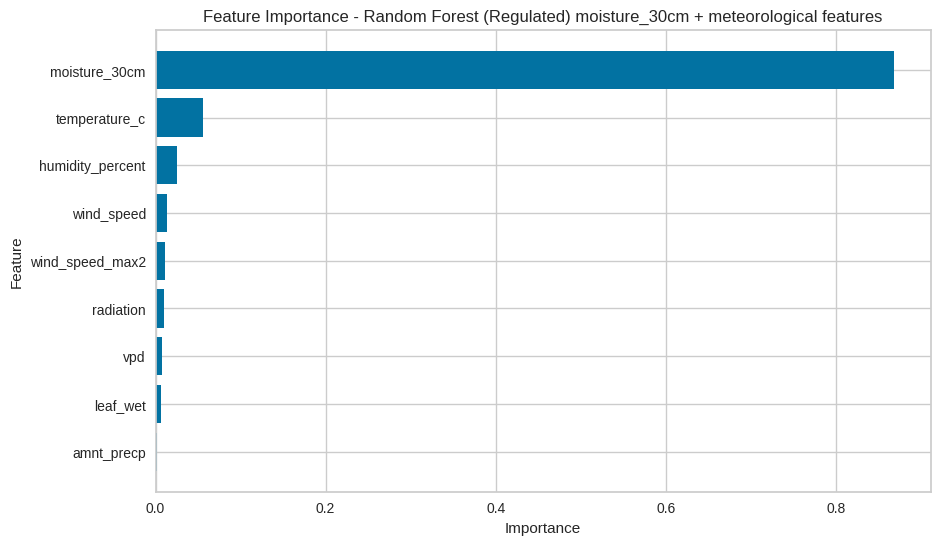

In [ ]:
print("\nFeature importance - Random Forest moisture_30cm + meteorological features:")
feat_imp_rf23 = pd.DataFrame({
    'Feature': X_train_full_30.columns,
    'Importance': rf_full_30.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf23)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf23['Feature'], feat_imp_rf23['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_30cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 40cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_40cm
X_train_40cm_only = train_base[['moisture_40cm']]
y_train_40cm_only = train_base['moisture_50cm']
X_test_40cm_only = test_base[['moisture_40cm']]
y_test_40cm_only = test_base['moisture_50cm']

# Full model (moisture_40cm + meteorological features)
features_to_exclude_50_from_40 = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_40 = train_base.drop(columns=features_to_exclude_50_from_40)
y_train_full_40 = train_base['moisture_50cm']
X_test_full_40 = test_base.drop(columns=features_to_exclude_50_from_40)
y_test_full_40 = test_base['moisture_50cm']

In [ ]:
# Model using only moisture_40cm
rf_40cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_40cm.fit(X_train_40cm_only, y_train_40cm_only)
y_train_pred_40cm = rf_40cm.predict(X_train_40cm_only)
y_test_pred_40cm = rf_40cm.predict(X_test_40cm_only)

print("\nRandom Forest - moisture_40cm only")
print("Train R2:", r2_score(y_train_40cm_only, y_train_pred_40cm))
print("Test R2:", r2_score(y_test_40cm_only, y_test_pred_40cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_40cm_only, y_train_pred_40cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_40cm_only, y_test_pred_40cm)))


Random Forest - moisture_40cm only
Train R2: 0.8854265202402676
Test R2: 0.8882198928352204
Train RMSE: 0.004774165828004721
Test RMSE: 0.004775817166940012


In [ ]:
# Model using moisture_40cm + meteorological features
rf_full_40 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_40.fit(X_train_full_40, y_train_full_40)
y_train_pred_full_40 = rf_full_40.predict(X_train_full_40)
y_test_pred_full_40 = rf_full_40.predict(X_test_full_40)

print("\nRandom Forest - moisture_40cm + meteorological features")
print("Train R2:", r2_score(y_train_full_40, y_train_pred_full_40))
print("Test R2:", r2_score(y_test_full_40, y_test_pred_full_40))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_40, y_train_pred_full_40)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_40, y_test_pred_full_40)))



Random Forest - moisture_40cm + meteorological features
Train R2: 0.9963793972699502
Test R2: 0.9762737805603127
Train RMSE: 0.00084868374761246
Test RMSE: 0.0022002888748764806


In [ ]:
#REGULATED
# Model using moisture_40cm + meteorological features
rf_full_40 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15)
rf_full_40.fit(X_train_full_40, y_train_full_40)
y_train_pred_full_40 = rf_full_40.predict(X_train_full_40)
y_test_pred_full_40 = rf_full_40.predict(X_test_full_40)

print("\nRandom Forest - moisture_40cm + meteorological features")
print("Train R2:", r2_score(y_train_full_40, y_train_pred_full_40))
print("Test R2:", r2_score(y_test_full_40, y_test_pred_full_40))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_40, y_train_pred_full_40)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_40, y_test_pred_full_40)))


Random Forest - moisture_40cm + meteorological features
Train R2: 0.9807222653464034
Test R2: 0.9686686345714683
Train RMSE: 0.0019583190438928217
Test RMSE: 0.002528454206733251



Feature importance - Random Forest moisture_40cm + meteorological features:
            Feature  Importance
0     moisture_40cm    0.917822
1     temperature_c    0.031807
2  humidity_percent    0.016717
6   wind_speed_max2    0.007853
7         radiation    0.007331
5        wind_speed    0.006366
4          leaf_wet    0.006117
8               vpd    0.004560
3        amnt_precp    0.001426


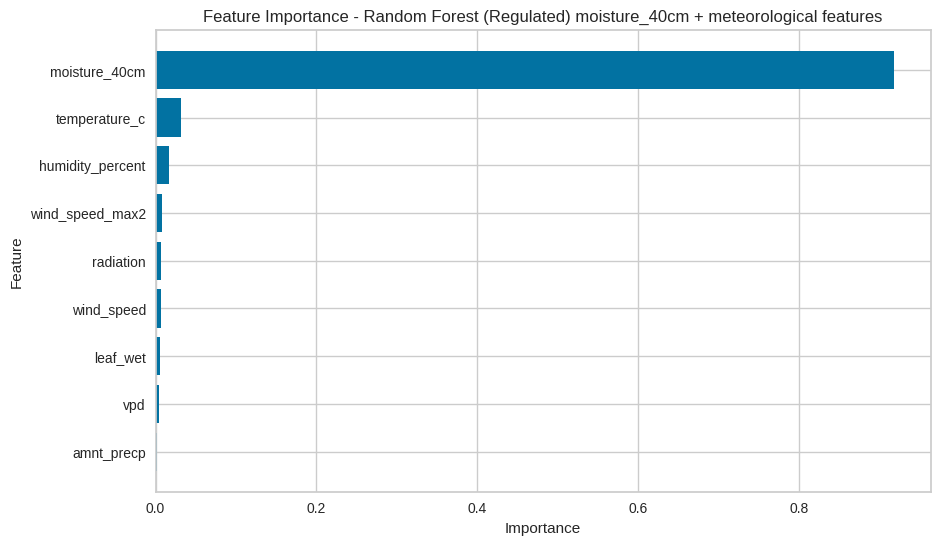

In [ ]:
print("\nFeature importance - Random Forest moisture_40cm + meteorological features:")
feat_imp_rf24 = pd.DataFrame({
    'Feature': X_train_full_40.columns,
    'Importance': rf_full_40.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf24)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf24['Feature'], feat_imp_rf24['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_40cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 60cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_60cm
X_train_60cm_only = train_base[['moisture_60cm']]
y_train_60cm_only = train_base['moisture_50cm']
X_test_60cm_only = test_base[['moisture_60cm']]
y_test_60cm_only = test_base['moisture_50cm']

# Full model (moisture_60cm + meteorological features)
features_to_exclude_50_from_60 = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'timestamp_device']
X_train_full_60 = train_base.drop(columns=features_to_exclude_50_from_60)
y_train_full_60 = train_base['moisture_50cm']
X_test_full_60 = test_base.drop(columns=features_to_exclude_50_from_60)
y_test_full_60 = test_base['moisture_50cm']

In [ ]:
# Model using only moisture_60cm
rf_60cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_60cm.fit(X_train_60cm_only, y_train_60cm_only)
y_train_pred_60cm = rf_60cm.predict(X_train_60cm_only)
y_test_pred_60cm = rf_60cm.predict(X_test_60cm_only)

print("\nRandom Forest - moisture_60cm only")
print("Train R2:", r2_score(y_train_60cm_only, y_train_pred_60cm))
print("Test R2:", r2_score(y_test_60cm_only, y_test_pred_60cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_60cm_only, y_train_pred_60cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_60cm_only, y_test_pred_60cm)))


Random Forest - moisture_60cm only
Train R2: 0.8941584984783847
Test R2: 0.8979500852657438
Train RMSE: 0.004588634270663498
Test RMSE: 0.004563223648925839


In [ ]:
# Model using moisture_60cm + meteorological features
rf_full_60 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_60.fit(X_train_full_60, y_train_full_60)
y_train_pred_full_60 = rf_full_60.predict(X_train_full_60)
y_test_pred_full_60 = rf_full_60.predict(X_test_full_60)

print("\nRandom Forest - moisture_60cm + meteorological features")
print("Train R2:", r2_score(y_train_full_60, y_train_pred_full_60))
print("Test R2:", r2_score(y_test_full_60, y_test_pred_full_60))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_60, y_train_pred_full_60)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_60, y_test_pred_full_60)))


Random Forest - moisture_60cm + meteorological features
Train R2: 0.9973763546108293
Test R2: 0.9828982330894992
Train RMSE: 0.0007224503669516538
Test RMSE: 0.0018680389309838885


In [ ]:
#REGULATEED
# Model using moisture_60cm + meteorological features
rf_full_60 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15)
rf_full_60.fit(X_train_full_60, y_train_full_60)
y_train_pred_full_60 = rf_full_60.predict(X_train_full_60)
y_test_pred_full_60 = rf_full_60.predict(X_test_full_60)

print("\nRandom Forest - moisture_60cm + meteorological features")
print("Train R2:", r2_score(y_train_full_60, y_train_pred_full_60))
print("Test R2:", r2_score(y_test_full_60, y_test_pred_full_60))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_60, y_train_pred_full_60)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_60, y_test_pred_full_60)))


Random Forest - moisture_60cm + meteorological features
Train R2: 0.985631601247233
Test R2: 0.9776389756915356
Train RMSE: 0.001690673066882842
Test RMSE: 0.0021360493312824543



Feature importance - Random Forest moisture_60cm + meteorological features:
            Feature  Importance
0     moisture_60cm    0.921930
1     temperature_c    0.037098
2  humidity_percent    0.014276
6   wind_speed_max2    0.006065
4          leaf_wet    0.005835
5        wind_speed    0.004565
7         radiation    0.004561
8               vpd    0.004559
3        amnt_precp    0.001110


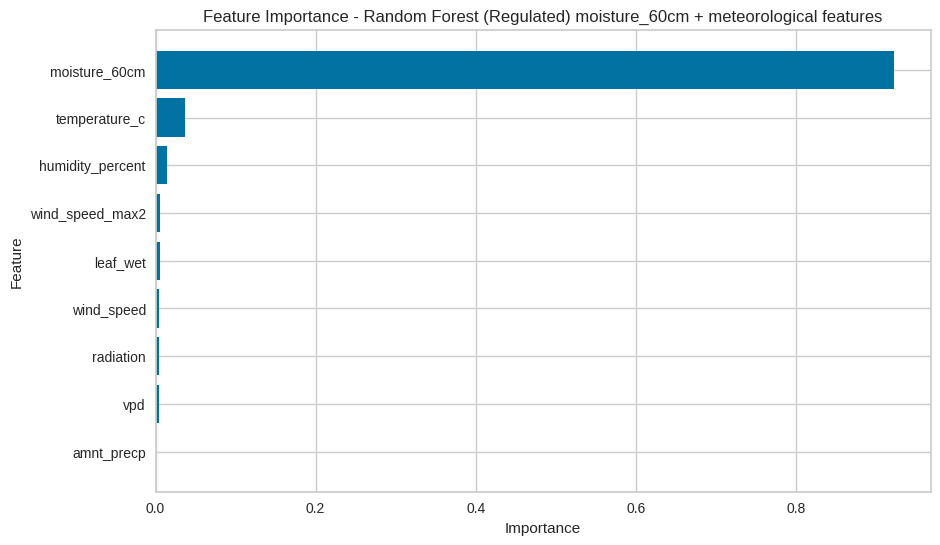

In [ ]:
print("\nFeature importance - Random Forest moisture_60cm + meteorological features:")
feat_imp_rf25 = pd.DataFrame({
    'Feature': X_train_full_60.columns,
    'Importance': rf_full_60.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf25)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf25['Feature'], feat_imp_rf25['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_60cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##Predicting moisture at 60cm depth

##from 10cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_10cm
X_train_10cm_only = train_base[['moisture_10cm']]
y_train_10cm_only = train_base['moisture_60cm']
X_test_10cm_only = test_base[['moisture_10cm']]
y_test_10cm_only = test_base['moisture_60cm']

# Full model (moisture_10cm + meteorological features)
features_to_exclude_60_from_10 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_10 = train_base.drop(columns=features_to_exclude_60_from_10)
y_train_full_10 = train_base['moisture_60cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_60_from_10)
y_test_full_10 = test_base['moisture_60cm']

In [ ]:
rf_10cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_10cm.fit(X_train_10cm_only, y_train_10cm_only)
y_train_pred_10cm = rf_10cm.predict(X_train_10cm_only)
y_test_pred_10cm = rf_10cm.predict(X_test_10cm_only)

print("\nRandom Forest - moisture_10cm only")
print("Train R2:", r2_score(y_train_10cm_only, y_train_pred_10cm))
print("Test R2:", r2_score(y_test_10cm_only, y_test_pred_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_10cm_only, y_train_pred_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_10cm_only, y_test_pred_10cm)))


Random Forest - moisture_10cm only
Train R2: 0.40417422609788534
Test R2: 0.39369169942648774
Train RMSE: 0.009403665097986468
Test RMSE: 0.009622464882445378


In [ ]:
rf_full_10 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_10.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10 = rf_full_10.predict(X_train_full_10)
y_test_pred_full_10 = rf_full_10.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10)))


Random Forest - moisture_10cm + meteorological features
Train R2: 0.982074732256653
Test R2: 0.880651257258668
Train RMSE: 0.0016310614996046023
Test RMSE: 0.004269219672868462


In [ ]:
#REGULATED
rf_full_10 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15)
rf_full_10.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10 = rf_full_10.predict(X_train_full_10)
y_test_pred_full_10 = rf_full_10.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10)))


Random Forest - moisture_10cm + meteorological features
Train R2: 0.8621934901554964
Test R2: 0.8017610175296969
Train RMSE: 0.004522435460150536
Test RMSE: 0.005502171306917573



Feature importance - Random Forest moisture_10cm + meteorological features:
            Feature  Importance
0     moisture_10cm    0.587112
1     temperature_c    0.161810
2  humidity_percent    0.098862
6   wind_speed_max2    0.041931
7         radiation    0.036169
5        wind_speed    0.030379
8               vpd    0.023313
4          leaf_wet    0.013820
3        amnt_precp    0.006604


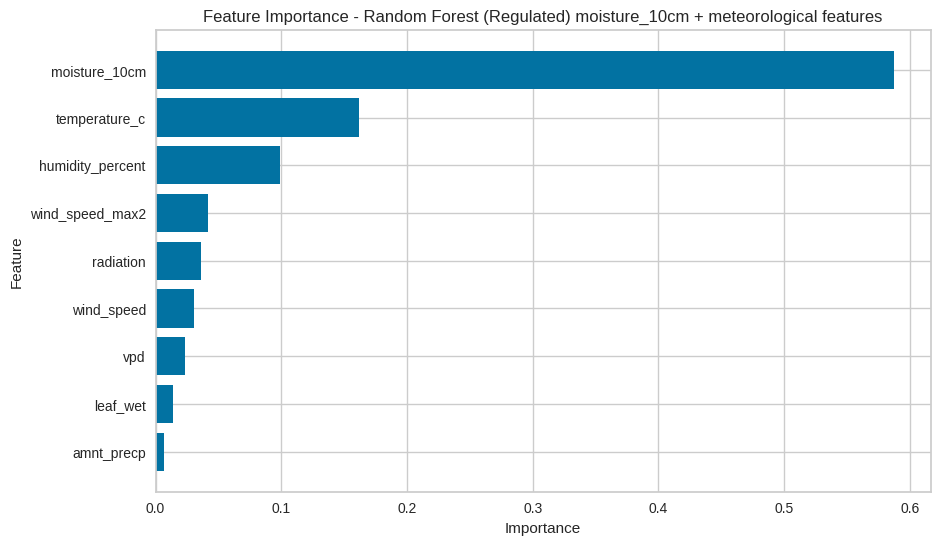

In [ ]:
print("\nFeature importance - Random Forest moisture_10cm + meteorological features:")
feat_imp_rf26 = pd.DataFrame({
    'Feature': X_train_full_10.columns,
    'Importance': rf_full_10.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf26)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf26['Feature'], feat_imp_rf26['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_10cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 20cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_20cm
X_train_20cm_only = train_base[['moisture_20cm']]
y_train_20cm_only = train_base['moisture_60cm']
X_test_20cm_only = test_base[['moisture_20cm']]
y_test_20cm_only = test_base['moisture_60cm']

# Full model (moisture_20cm + meteorological features)
features_to_exclude_60_from_20 = ['moisture_10cm', 'moisture_30cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_20 = train_base.drop(columns=features_to_exclude_60_from_20)
y_train_full_20 = train_base['moisture_60cm']
X_test_full_20 = test_base.drop(columns=features_to_exclude_60_from_20)
y_test_full_20 = test_base['moisture_60cm']


In [ ]:
rf_20cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_20cm.fit(X_train_20cm_only, y_train_20cm_only)
y_train_pred_20cm = rf_20cm.predict(X_train_20cm_only)
y_test_pred_20cm = rf_20cm.predict(X_test_20cm_only)

print("\nRandom Forest - moisture_20cm only")
print("Train R2:", r2_score(y_train_20cm_only, y_train_pred_20cm))
print("Test R2:", r2_score(y_test_20cm_only, y_test_pred_20cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_20cm_only, y_train_pred_20cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_20cm_only, y_test_pred_20cm)))


Random Forest - moisture_20cm only
Train R2: 0.5917720979042292
Test R2: 0.5937164949629745
Train RMSE: 0.0077837495469844226
Test RMSE: 0.00787687898068556


In [ ]:
rf_full_20 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_20.fit(X_train_full_20, y_train_full_20)
y_train_pred_full_20 = rf_full_20.predict(X_train_full_20)
y_test_pred_full_20 = rf_full_20.predict(X_test_full_20)

print("\nRandom Forest - moisture_20cm + meteorological features")
print("Train R2:", r2_score(y_train_full_20, y_train_pred_full_20))
print("Test R2:", r2_score(y_test_full_20, y_test_pred_full_20))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_20, y_train_pred_full_20)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_20, y_test_pred_full_20)))


Random Forest - moisture_20cm + meteorological features
Train R2: 0.989672950652104
Test R2: 0.9295954438014327
Train RMSE: 0.00123801423130706
Test RMSE: 0.003278989005269275


In [ ]:
#REGULATED
rf_full_20 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15)
rf_full_20.fit(X_train_full_20, y_train_full_20)
y_train_pred_full_20 = rf_full_20.predict(X_train_full_20)
y_test_pred_full_20 = rf_full_20.predict(X_test_full_20)

print("\nRandom Forest - moisture_20cm + meteorological features")
print("Train R2:", r2_score(y_train_full_20, y_train_pred_full_20))
print("Test R2:", r2_score(y_test_full_20, y_test_pred_full_20))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_20, y_train_pred_full_20)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_20, y_test_pred_full_20)))


Random Forest - moisture_20cm + meteorological features
Train R2: 0.9179959304232101
Test R2: 0.8873543298792113
Train RMSE: 0.0034886324298282227
Test RMSE: 0.004147599651466328



Feature importance - Random Forest moisture_20cm + meteorological features:
            Feature  Importance
0     moisture_20cm    0.725244
1     temperature_c    0.099906
2  humidity_percent    0.054779
6   wind_speed_max2    0.032134
5        wind_speed    0.026185
4          leaf_wet    0.023976
7         radiation    0.021781
8               vpd    0.011217
3        amnt_precp    0.004780


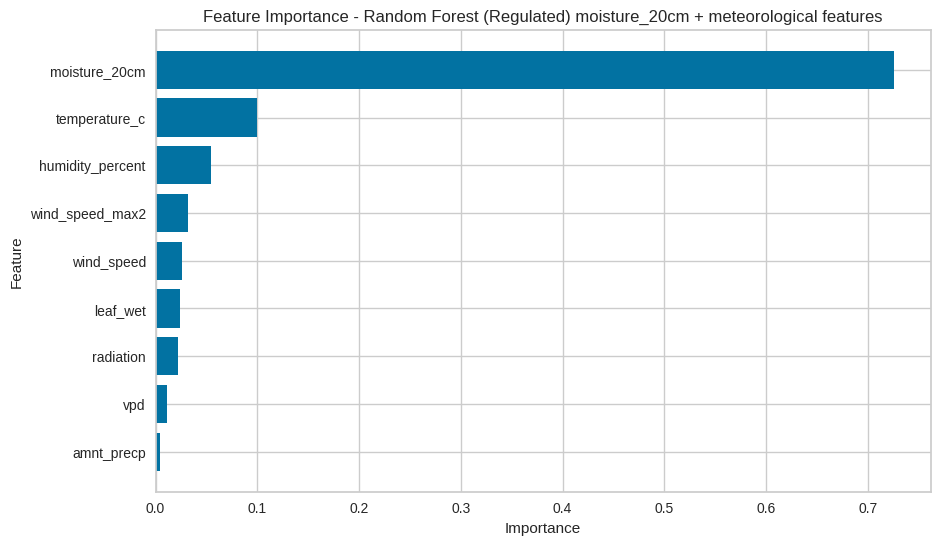

In [ ]:
print("\nFeature importance - Random Forest moisture_20cm + meteorological features:")
feat_imp_rf27 = pd.DataFrame({
    'Feature': X_train_full_20.columns,
    'Importance': rf_full_20.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf27)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf27['Feature'], feat_imp_rf27['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_20cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 30cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_30cm
X_train_30cm_only = train_base[['moisture_30cm']]
y_train_30cm_only = train_base['moisture_60cm']
X_test_30cm_only = test_base[['moisture_30cm']]
y_test_30cm_only = test_base['moisture_60cm']

# Full model (moisture_30cm + meteorological features)
features_to_exclude_60_from_30 = ['moisture_10cm', 'moisture_20cm', 'moisture_40cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_30 = train_base.drop(columns=features_to_exclude_60_from_30)
y_train_full_30 = train_base['moisture_60cm']
X_test_full_30 = test_base.drop(columns=features_to_exclude_60_from_30)
y_test_full_30 = test_base['moisture_60cm']


In [ ]:
rf_30cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_30cm.fit(X_train_30cm_only, y_train_30cm_only)
y_train_pred_30cm = rf_30cm.predict(X_train_30cm_only)
y_test_pred_30cm = rf_30cm.predict(X_test_30cm_only)

print("\nRandom Forest - moisture_30cm only")
print("Train R2:", r2_score(y_train_30cm_only, y_train_pred_30cm))
print("Test R2:", r2_score(y_test_30cm_only, y_test_pred_30cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_30cm_only, y_train_pred_30cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_30cm_only, y_test_pred_30cm)))


Random Forest - moisture_30cm only
Train R2: 0.6259754770862132
Test R2: 0.6308337646999422
Train RMSE: 0.0074505365525131635
Test RMSE: 0.007508454687286483


In [ ]:
rf_full_30 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_30.fit(X_train_full_30, y_train_full_30)
y_train_pred_full_30 = rf_full_30.predict(X_train_full_30)
y_test_pred_full_30 = rf_full_30.predict(X_test_full_30)

print("\nRandom Forest - moisture_30cm + meteorological features")
print("Train R2:", r2_score(y_train_full_30, y_train_pred_full_30))
print("Test R2:", r2_score(y_test_full_30, y_test_pred_full_30))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_30, y_train_pred_full_30)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_30, y_test_pred_full_30)))


Random Forest - moisture_30cm + meteorological features
Train R2: 0.9891171133991363
Test R2: 0.9248612688227038
Train RMSE: 0.0012708946831961744
Test RMSE: 0.00338743918008705


In [ ]:
#REGULATED
rf_full_30 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_30.fit(X_train_full_30, y_train_full_30)
y_train_pred_full_30 = rf_full_30.predict(X_train_full_30)
y_test_pred_full_30 = rf_full_30.predict(X_test_full_30)

print("\nRandom Forest - moisture_30cm + meteorological features")
print("Train R2:", r2_score(y_train_full_30, y_train_pred_full_30))
print("Test R2:", r2_score(y_test_full_30, y_test_pred_full_30))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_30, y_train_pred_full_30)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_30, y_test_pred_full_30)))


Random Forest - moisture_30cm + meteorological features
Train R2: 0.9266119156686067
Test R2: 0.8933393571571749
Train RMSE: 0.003300276192969554
Test RMSE: 0.0040359118889579495



Feature importance - Random Forest moisture_30cm + meteorological features:
            Feature  Importance
0     moisture_30cm    0.730299
1     temperature_c    0.109347
2  humidity_percent    0.057125
5        wind_speed    0.026661
4          leaf_wet    0.020863
6   wind_speed_max2    0.020036
7         radiation    0.018487
8               vpd    0.013049
3        amnt_precp    0.004132


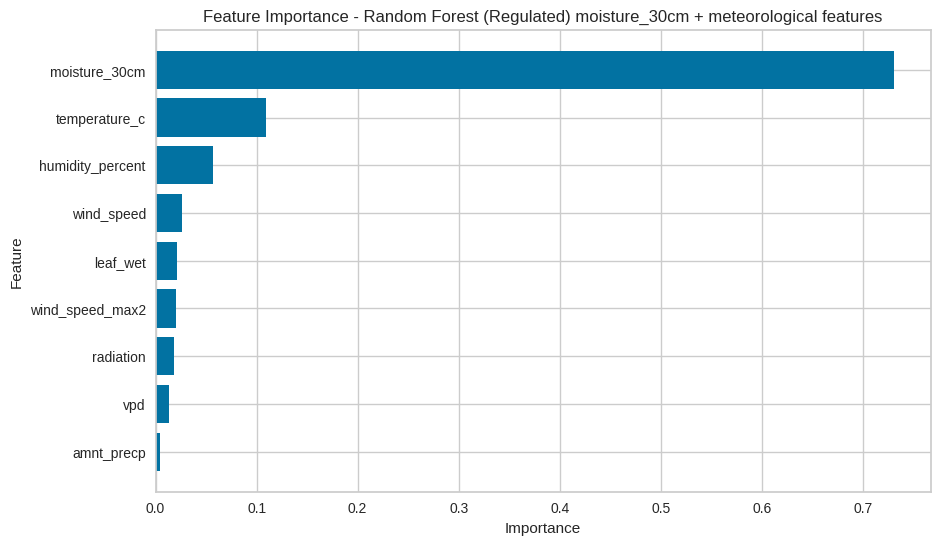

In [ ]:
print("\nFeature importance - Random Forest moisture_30cm + meteorological features:")
feat_imp_rf28 = pd.DataFrame({
    'Feature': X_train_full_30.columns,
    'Importance': rf_full_30.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf28)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf28['Feature'], feat_imp_rf28['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest (Regulated) moisture_30cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 40cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_40cm
X_train_40cm_only = train_base[['moisture_40cm']]
y_train_40cm_only = train_base['moisture_60cm']
X_test_40cm_only = test_base[['moisture_40cm']]
y_test_40cm_only = test_base['moisture_60cm']

# Full model (moisture_40cm + meteorological features)
features_to_exclude_60_from_40 = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_50cm', 'moisture_60cm', 'timestamp_device']
X_train_full_40 = train_base.drop(columns=features_to_exclude_60_from_40)
y_train_full_40 = train_base['moisture_60cm']
X_test_full_40 = test_base.drop(columns=features_to_exclude_60_from_40)
y_test_full_40 = test_base['moisture_60cm']

In [ ]:
rf_40cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_40cm.fit(X_train_40cm_only, y_train_40cm_only)
y_train_pred_40cm = rf_40cm.predict(X_train_40cm_only)
y_test_pred_40cm = rf_40cm.predict(X_test_40cm_only)

print("\nRandom Forest - moisture_40cm only")
print("Train R2:", r2_score(y_train_40cm_only, y_train_pred_40cm))
print("Test R2:", r2_score(y_test_40cm_only, y_test_pred_40cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_40cm_only, y_train_pred_40cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_40cm_only, y_test_pred_40cm)))


Random Forest - moisture_40cm only
Train R2: 0.6783304100433523
Test R2: 0.6849267689796451
Train RMSE: 0.00690943465040007
Test RMSE: 0.0069365789098110925


In [ ]:
rf_full_40 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_40.fit(X_train_full_40, y_train_full_40)
y_train_pred_full_40 = rf_full_40.predict(X_train_full_40)
y_test_pred_full_40 = rf_full_40.predict(X_test_full_40)

print("\nRandom Forest - moisture_40cm + meteorological features")
print("Train R2:", r2_score(y_train_full_40, y_train_pred_full_40))
print("Test R2:", r2_score(y_test_full_40, y_test_pred_full_40))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_40, y_train_pred_full_40)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_40, y_test_pred_full_40)))


Random Forest - moisture_40cm + meteorological features
Train R2: 0.9905776672859484
Test R2: 0.9373484917087122
Train RMSE: 0.0011825424201921638
Test RMSE: 0.003093181066879747


In [ ]:
#REGULATED
rf_full_40 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15)
rf_full_40.fit(X_train_full_40, y_train_full_40)
y_train_pred_full_40 = rf_full_40.predict(X_train_full_40)
y_test_pred_full_40 = rf_full_40.predict(X_test_full_40)

print("\nRandom Forest - moisture_40cm + meteorological features")
print("Train R2:", r2_score(y_train_full_40, y_train_pred_full_40))
print("Test R2:", r2_score(y_test_full_40, y_test_pred_full_40))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_40, y_train_pred_full_40)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_40, y_test_pred_full_40)))


Random Forest - moisture_40cm + meteorological features
Train R2: 0.9370978468009005
Test R2: 0.9095683936061824
Train RMSE: 0.0030554154256961855
Test RMSE: 0.0037162053191406312



Feature importance - Random Forest moisture_40cm + meteorological features:
            Feature  Importance
0     moisture_40cm    0.771995
1     temperature_c    0.086383
2  humidity_percent    0.056407
4          leaf_wet    0.020973
6   wind_speed_max2    0.018940
7         radiation    0.016183
5        wind_speed    0.016150
8               vpd    0.010294
3        amnt_precp    0.002676


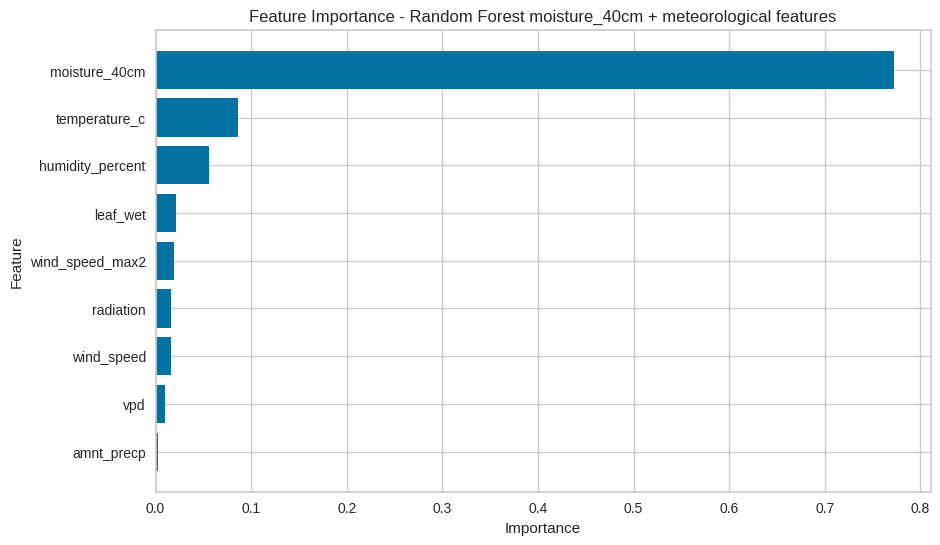

In [ ]:
print("\nFeature importance - Random Forest moisture_40cm + meteorological features:")
feat_imp_rf29 = pd.DataFrame({
    'Feature': X_train_full_40.columns,
    'Importance': rf_full_40.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf29)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf29['Feature'], feat_imp_rf29['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest moisture_40cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##from 50cm

In [ ]:
# ==== 1. Separate features and targets ====

# Model using only moisture_50cm
X_train_50cm_only = train_base[['moisture_50cm']]
y_train_50cm_only = train_base['moisture_60cm']
X_test_50cm_only = test_base[['moisture_50cm']]
y_test_50cm_only = test_base['moisture_60cm']

# Full model (moisture_50cm + meteorological features)
features_to_exclude_60_from_50 = ['moisture_10cm', 'moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device']
X_train_full_50 = train_base.drop(columns=features_to_exclude_60_from_50)
y_train_full_50 = train_base['moisture_60cm']
X_test_full_50 = test_base.drop(columns=features_to_exclude_60_from_50)
y_test_full_50 = test_base['moisture_60cm']

In [ ]:
rf_50cm = RandomForestRegressor(random_state=42, n_estimators=100)
rf_50cm.fit(X_train_50cm_only, y_train_50cm_only)
y_train_pred_50cm = rf_50cm.predict(X_train_50cm_only)
y_test_pred_50cm = rf_50cm.predict(X_test_50cm_only)

print("\nRandom Forest - moisture_50cm only")
print("Train R2:", r2_score(y_train_50cm_only, y_train_pred_50cm))
print("Test R2:", r2_score(y_test_50cm_only, y_test_pred_50cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_50cm_only, y_train_pred_50cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_50cm_only, y_test_pred_50cm)))


Random Forest - moisture_50cm only
Train R2: 0.8992572764341693
Test R2: 0.9029150776569513
Train RMSE: 0.0038667345130417286
Test RMSE: 0.003850485316783903


In [ ]:
rf_full_50 = RandomForestRegressor(random_state=42, n_estimators=100)
rf_full_50.fit(X_train_full_50, y_train_full_50)
y_train_pred_full_50 = rf_full_50.predict(X_train_full_50)
y_test_pred_full_50 = rf_full_50.predict(X_test_full_50)

print("\nRandom Forest - moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_50, y_train_pred_full_50))
print("Test R2:", r2_score(y_test_full_50, y_test_pred_full_50))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_50, y_train_pred_full_50)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_50, y_test_pred_full_50)))


Random Forest - moisture_50cm + meteorological features
Train R2: 0.997432058709588
Test R2: 0.9824559326808568
Train RMSE: 0.0006173480150686914
Test RMSE: 0.0016368343122738548


In [ ]:
#REGULATED
rf_full_50 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth = 15)
rf_full_50.fit(X_train_full_50, y_train_full_50)
y_train_pred_full_50 = rf_full_50.predict(X_train_full_50)
y_test_pred_full_50 = rf_full_50.predict(X_test_full_50)

print("\nRandom Forest - moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_50, y_train_pred_full_50))
print("Test R2:", r2_score(y_test_full_50, y_test_pred_full_50))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_50, y_train_pred_full_50)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_50, y_test_pred_full_50)))


Random Forest - moisture_50cm + meteorological features
Train R2: 0.9857969853087132
Test R2: 0.9778968849463883
Train RMSE: 0.0014518701588606226
Test RMSE: 0.0018372418097000378



Feature importance - Random Forest moisture_50cm + meteorological features:
            Feature  Importance
0     moisture_50cm    0.918638
1     temperature_c    0.039211
2  humidity_percent    0.014544
6   wind_speed_max2    0.008141
4          leaf_wet    0.006823
7         radiation    0.004642
8               vpd    0.003564
5        wind_speed    0.003339
3        amnt_precp    0.001098


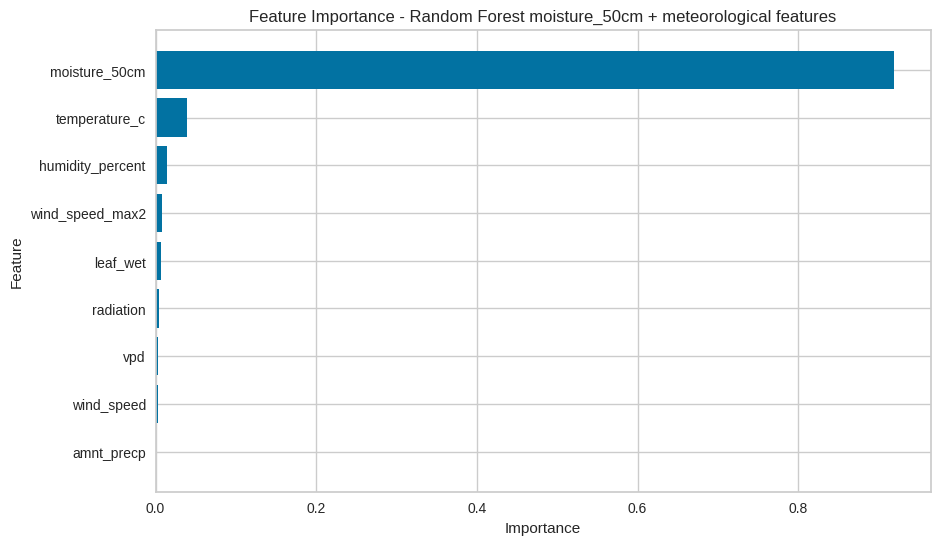

In [ ]:
print("\nFeature importance - Random Forest moisture_50cm + meteorological features:")
feat_imp_rf30 = pd.DataFrame({
    'Feature': X_train_full_50.columns,
    'Importance': rf_full_50.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf30)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf30['Feature'], feat_imp_rf30['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest moisture_50cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Collect all feature importance DataFrames into a list (To use them for feature importance analysis by depth)
feat_imp_list = [globals()[f'feat_imp_rf{i}'].assign(Model=f'rf{i}') for i in range(1, 31)]

# Concatenate them all into a single DataFrame
all_feat_imp = pd.concat(feat_imp_list, ignore_index=True)

# Save to CSV
all_feat_imp.to_csv('all_feature_importances.csv', index=False)

print("All feature importances saved to 'all_feature_importances.csv'")

All feature importances saved to 'all_feature_importances.csv'


In [ ]:
all_feat_imp

,Feature,Importance,Model
0,moisture_20cm,0.829868,rf1
1,temperature_c,0.066126,rf1
2,humidity_percent,0.040430,rf1
3,wind_speed_max2,0.017303,rf1
4,radiation,0.017159,rf1
...,...,...,...
265,leaf_wet,0.006823,rf30
266,radiation,0.004642,rf30
267,vpd,0.003564,rf30
268,wind_speed,0.003339,rf30
